_____
# <p style="text-align: center;">__Passenger Satisfaction Prediction - Binary Classification__<p>
_____

These datasets contains 23 feature columns and 1 target column (Satisfaction). In detail, these are:

- id: a unique number for each passanger
- Satisfaction: Airline satisfaction level(Satisfaction, Neutral or Dissatisfaction)
- Age: The actual age of the passengers
- Gender: Gender of the passengers (Female, Male)
- Type of Travel: Purpose of the flight of the passengers (Personal, Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Customer Type: The customer type (Loyal customer, Disloyal customer)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Ease of Online booking: Satisfaction level of online booking (0:Not Applicable;1-5)
- Inflight service: Satisfaction level of inflight service (0:Not Applicable;1-5)
- Online boarding: Satisfaction level of online boarding (0:Not Applicable;1-5)
- Inflight entertainment: Satisfaction level of inflight entertainment (0:Not Applicable;1-5)
- Food and drink: Satisfaction level of food and drink (0:Not Applicable;1-5)
- Seat comfort: Satisfaction level of seat comfort (0:Not Applicable;1-5)
- On-board service: Satisfaction level of on-board service (0:Not Applicable;1-5)
- Leg room service: Satisfaction level of leg room service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of departure/arrival time convenient (0:Not Applicable;1-5)
- Baggage handling: Satisfaction level of baggage handling (0:Not Applicable;1-5)
- Gate location: Satisfaction level of gate location (0:Not Applicable;1-5)
- Cleanliness: Satisfaction level of cleanliness (0:Not Applicable;1-5)
- Check-in service: Satisfaction level of check-in service (0:Not Applicable;1-5)
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when arrival

## __Step 1 - Importing Libraries and Data__

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
excel_file_path = '/content/drive/My Drive/Colab Notebooks/My Beginner Projects/Passenger Satisfaction - B.Classification/satisfaction_2015.xlsx'
df = pd.read_excel(excel_file_path)

## __Step 2 - EDA and Feature Eng.__

### _Step 2.1 - Data Overview_

In [5]:
#Let's create an original dataframe copy
df_original=df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [7]:
# Data has some missing info clearly, we will handle them after the overview

In [8]:
pd.set_option('display.max_columns', 30)

In [9]:
df.head(5)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0


In [10]:
df.describe().round(2)

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,64940.50,39.43,1190.32,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
std,37493.27,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,32470.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,64940.50,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,97410.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [11]:
# Checking the 1592 min waited passenger was satisfied or not for only arbitrary reasons
df[df["Departure Delay in Minutes"]==1592]["satisfaction_v2"]

9910    neutral or dissatisfied
Name: satisfaction_v2, dtype: object

In [12]:
# She was not, as expected

### _Step 2.2 - Duplicated Row Check_

In [13]:
df.duplicated().sum()

0

In [14]:
# There is no duplicated row

### _Step 2.3 - Missing Value Check_

#### _Step 2.3.1 - Basic Missing Check_

In [15]:
#Basic missing value check as follows...
df.isna().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [16]:
#We have 393 missing value in the "Arrival Delay in Minutes" column.
#Let's examine the column in detail to decide the imputation method.
df["Arrival Delay in Minutes"].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [17]:
#Finding Mode of the variable
df["Arrival Delay in Minutes"].value_counts().nlargest(10)

0.0    72753
1.0     2747
2.0     2587
3.0     2442
4.0     2373
5.0     2083
6.0     2021
7.0     1794
8.0     1751
9.0     1566
Name: Arrival Delay in Minutes, dtype: int64

In [18]:
len(df[df["Arrival Delay in Minutes"]==0])/len(df)

0.5601555281798584

In [19]:
393/len(df)

0.003025870033877425

In [20]:
#More than half of the data has value of 0 so it would be reasonable to set the missing values as zero for the 393 missing rows-
#-which are almost 0.3 % of the data. However, let me try to find a more reasonable way by considering cross-variable relations

In [21]:
#I will check the relation of Arrival Delay in Minutes and Departure Delay in Minutes variables

In [22]:
sns.set_style("whitegrid")

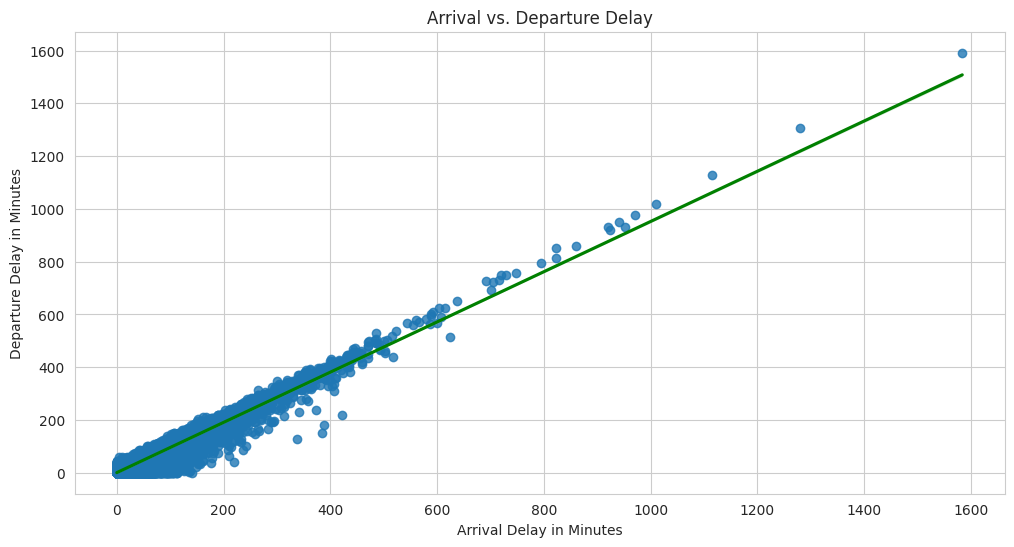

In [23]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x="Arrival Delay in Minutes", y="Departure Delay in Minutes",line_kws={'color': 'green'})
plt.title("Arrival vs. Departure Delay")
plt.show()


In [24]:
print("Correlation btw Arrival and Departure Delays: {}".format(df["Arrival Delay in Minutes"].corr(df["Departure Delay in Minutes"]).round(2)))

Correlation btw Arrival and Departure Delays: 0.97


In [25]:
# As we can see from the above graph and correlation, Arrival Delays and Departure Delays are extremely corrolated

# Then lets set the missing Arrival Delay values to Departure Delay values of that passenger after the advanced missing check

#### _Step 2.3.2 - Advanced Missing Check_

In [26]:
#Sometimes, the cells are not empty but filled with values representing its empty or missing such as : "?" and "na"

#In order to catch these cells we might have 2 following approaches:

#1)Checking datatypes and unique values of columns. However this method could be time consuming when the dataset-
#-has too many columns and the categoric columns have too many unique values.

#2)Second approach could be creating a list of possible missing value substitutes and searching for them through the
#-entire data set if the type of values are string. This method could be compututationaly cost with large datasets.

#I will go for the second approach here

In [27]:
#Let's create a function for this approach

In [28]:
def adv_miss_check(df):
    no_info_types=[" ","-","--","na","n/a","?","no info","missing info","*"]

    df=df.applymap(lambda x: str(x).lower() if isinstance(x, str) else x)

    missing_rows = df[df.apply(lambda row: row.isin(no_info_types).any(), axis=1)]

    #Here we will get the rows in dataframe format, instead we can just get indexes
    #by the following code in comment and return indexes rather than missing_rows
    #missing_rows_indexes=missing_rows.index

    return missing_rows

In [29]:
adv_miss_check(df)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes


In [30]:
#Luckly we don't have any hiding missing value

### _Step 2.4 - Missing Value Imputation_

In [31]:
# Let's set the missing Arrival Delay values to Departure Delay values of that passenger
df.loc[df["Arrival Delay in Minutes"].isna(),"Arrival Delay in Minutes"]=df["Departure Delay in Minutes"]

In [32]:
df.isna().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### _Step 2.5 - Reference Model_

#### _Step 2.5.1 - Dataset Preparetion for Basic Modelling_

In [33]:
#Let's create a copy of our data frame, apply one hot encoding to categorical variables to see-
#-the results of a very simple model. After that, we will perform EDA and and Feature engineering-
#-to evolve the results.

In [34]:
df_basic=df.copy()

In [35]:
df_basic.head(5)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0


In [36]:
# Let's drop the ID column which is not effective for the model

In [37]:
df_basic.drop(columns="id",inplace=True)

In [38]:
#We can see that there is no categorical column in form of numbers

In [39]:
basic_cat_cols=df_basic.select_dtypes(include="object").columns.tolist()

In [40]:
basic_cat_cols

['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [41]:
# I will use a function to perform one hot encoding to the categorical columns and drop the raw variable columns.

In [42]:
# One_Hot_Encoder works with:
    # df: should be type of pandas.core.frame.DataFrame
    # to_be_encoded: should be type of either one of the following ["pandas.core.indexes.base.Index","list","tuple"]

def One_Hot_Encoder(df,to_be_encoded):

    ### Input variable checks & errors

    wrong_column_name=[]

    if isinstance(df, pd.core.frame.DataFrame)==False:
        print("The first variable is not a pandas data frame, please enter a pandas data frame")
        return

    if len(df)==0:
        print("The data frame is empty, please check your data frame.")
        return

    if len(to_be_encoded)==0:
        print("The list of columns, to be encoded, is empty. Please check your list.")
        return

    for i in to_be_encoded:
        if i not in df.columns.tolist():
            wrong_column_name.append(i)

    if len(wrong_column_name)>0:
        if len(wrong_column_name)==1:
            print("There is no such a column as: {}".format(wrong_column_name))
        if len(wrong_column_name)>1:
            print("There are no columns as: {}".format(wrong_column_name))
        return

    ### N-1 Cluster Encoding

    for i in to_be_encoded:
        dummies=pd.get_dummies(df[i],drop_first=True,prefix=i).astype(int)
        df=pd.concat([df,dummies],axis=1)
        df.drop(columns=i,inplace=True)

    print("encoded_df is prepared")
    return df

In [43]:
df_basic=One_Hot_Encoder(df_basic,basic_cat_cols)

encoded_df is prepared


In [44]:
df_basic.head(1)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_v2_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,56,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0,1,1,1,1,1,0


In [45]:
basic_X=df_basic.drop(["satisfaction_v2_satisfied"],axis=1)

In [46]:
basic_X.head(1)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,56,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0,1,1,1,1,0


In [47]:
basic_Y=df_basic["satisfaction_v2_satisfied"]

In [48]:
basic_Y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    1
129877    1
129878    1
129879    1
Name: satisfaction_v2_satisfied, Length: 129880, dtype: int64

#### _Step 2.5.2 - Basic Model Preperation_

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [50]:
#To be able to perform a comparative evaluation fairly, I will split the basic_X into train val and test sets in a way-
#-that I will do for the improved dataset.

In [51]:
basic_X_train, basic_X_test, basic_y_train, basic_y_test = train_test_split(basic_X, basic_Y, test_size=0.2, stratify=basic_Y, random_state=42)
basic_X_train, basic_X_val, basic_y_train, basic_y_val = train_test_split(basic_X_train, basic_y_train, test_size=0.25, stratify=basic_y_train, random_state=42)

In [52]:
basic_model = LogisticRegression(solver='liblinear')
basic_model.fit(basic_X_train,basic_y_train)

LogisticRegression(solver='liblinear')

In [53]:
basic_y_pred=basic_model.predict(basic_X_test)

#### _Step 2.5.3 - Basic Model Evaluation_

In [244]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [114]:
print("Accuracy Score on Test Data:",accuracy_score(basic_y_test,basic_y_pred))
print("\n")
print(classification_report(basic_y_test,basic_y_pred))

Accuracy Score on Test Data: 0.8790421927933477


              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14690
           1       0.88      0.84      0.86     11286

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.88     25976
weighted avg       0.88      0.88      0.88     25976



In [116]:
basic_y_pred_train=basic_model.predict(basic_X_train)
print("Accuracy Score on Train Data:",accuracy_score(basic_y_train,basic_y_pred_train))
print("\n")
print(classification_report(basic_y_train,basic_y_pred_train))

Accuracy Score on Train Data: 0.8720613900010266


              precision    recall  f1-score   support

           0       0.88      0.90      0.89     44071
           1       0.87      0.83      0.85     33857

    accuracy                           0.87     77928
   macro avg       0.87      0.87      0.87     77928
weighted avg       0.87      0.87      0.87     77928



In [56]:
# Let's draw the feature importance graph with the absolute values of importance

In [57]:
basic_feature_importance = basic_model.coef_[0]
basic_feature_importance=np.abs(basic_feature_importance)
sorted_indices = np.argsort(basic_feature_importance)[::-1]
feature_names = df.columns.tolist()

In [58]:
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = basic_feature_importance[sorted_indices]

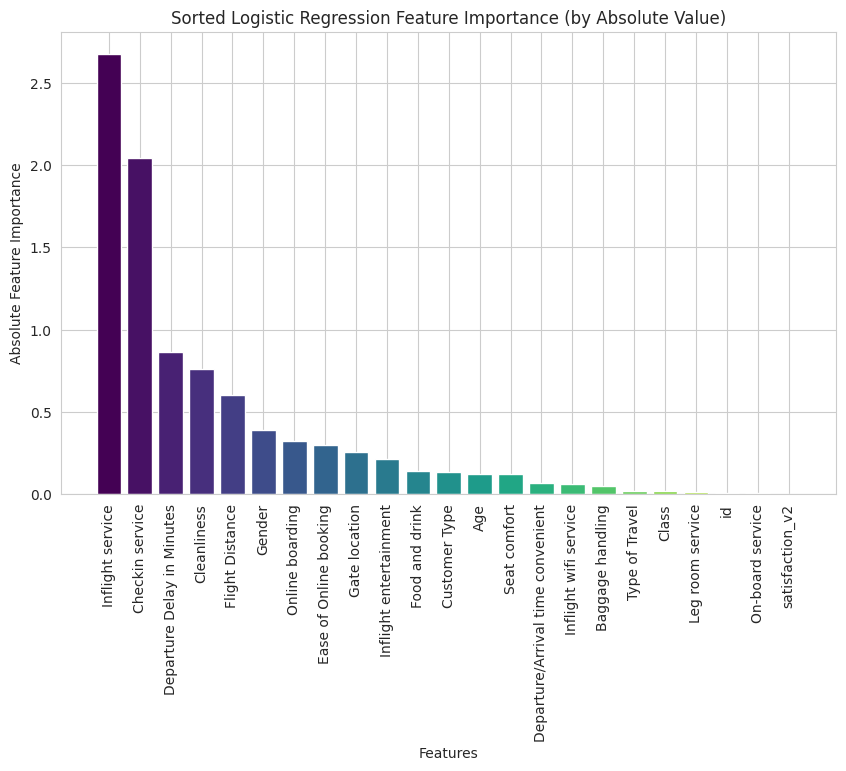

In [59]:
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_feature_importance)))
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance,color=colors)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Absolute Feature Importance")
plt.title("Sorted Logistic Regression Feature Importance (by Absolute Value)")
plt.show()

In [117]:
# According to our reference (basic) model, it looks like "Type of Travel_Personal Travel", "Class_Eco_Plus" and-
# -"Disloyal Cusyomer" are the most important features.

In [118]:
# We have almost 0.88 Accucary of test dataset and 0.87 Accuracy of train dataset with this raw dataset
# There is no variance(overfitting/underfitting) problem but we have a high bias.

In [121]:
# After selecting the best model and improving the model by parameter tuning, we will see-
# -how much we have progressed from the reference model. I hope we will reduce the cost while keeping the control of variance.

### _Step 2.6 - Detailed Look at the Variables - EDA_

#### _Step 2.6.1 - Categorical-Numerical Columns_

In [63]:
df.head(5)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0


In [64]:
# Let's drop the ID column which is not effective for the model

In [65]:
df.drop(columns="id",inplace=True)

In [66]:
df.columns

Index(['satisfaction_v2', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [67]:
#It looks like all the categorical columns are in string format, so let's seperate the categorical and numerical columns.

In [68]:
num_cols=df.select_dtypes(exclude="object").columns.tolist()
cat_cols=df.select_dtypes(include="object").columns.tolist()
print("Numerical columns are:",num_cols)
print("Categorical columns are:",cat_cols)

Numerical columns are: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Categorical columns are: ['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


#### _Step 2.6.2 - Variable Inspection by Visualization_

In [69]:
# Let's create a loop to see the distribution of numerical variables

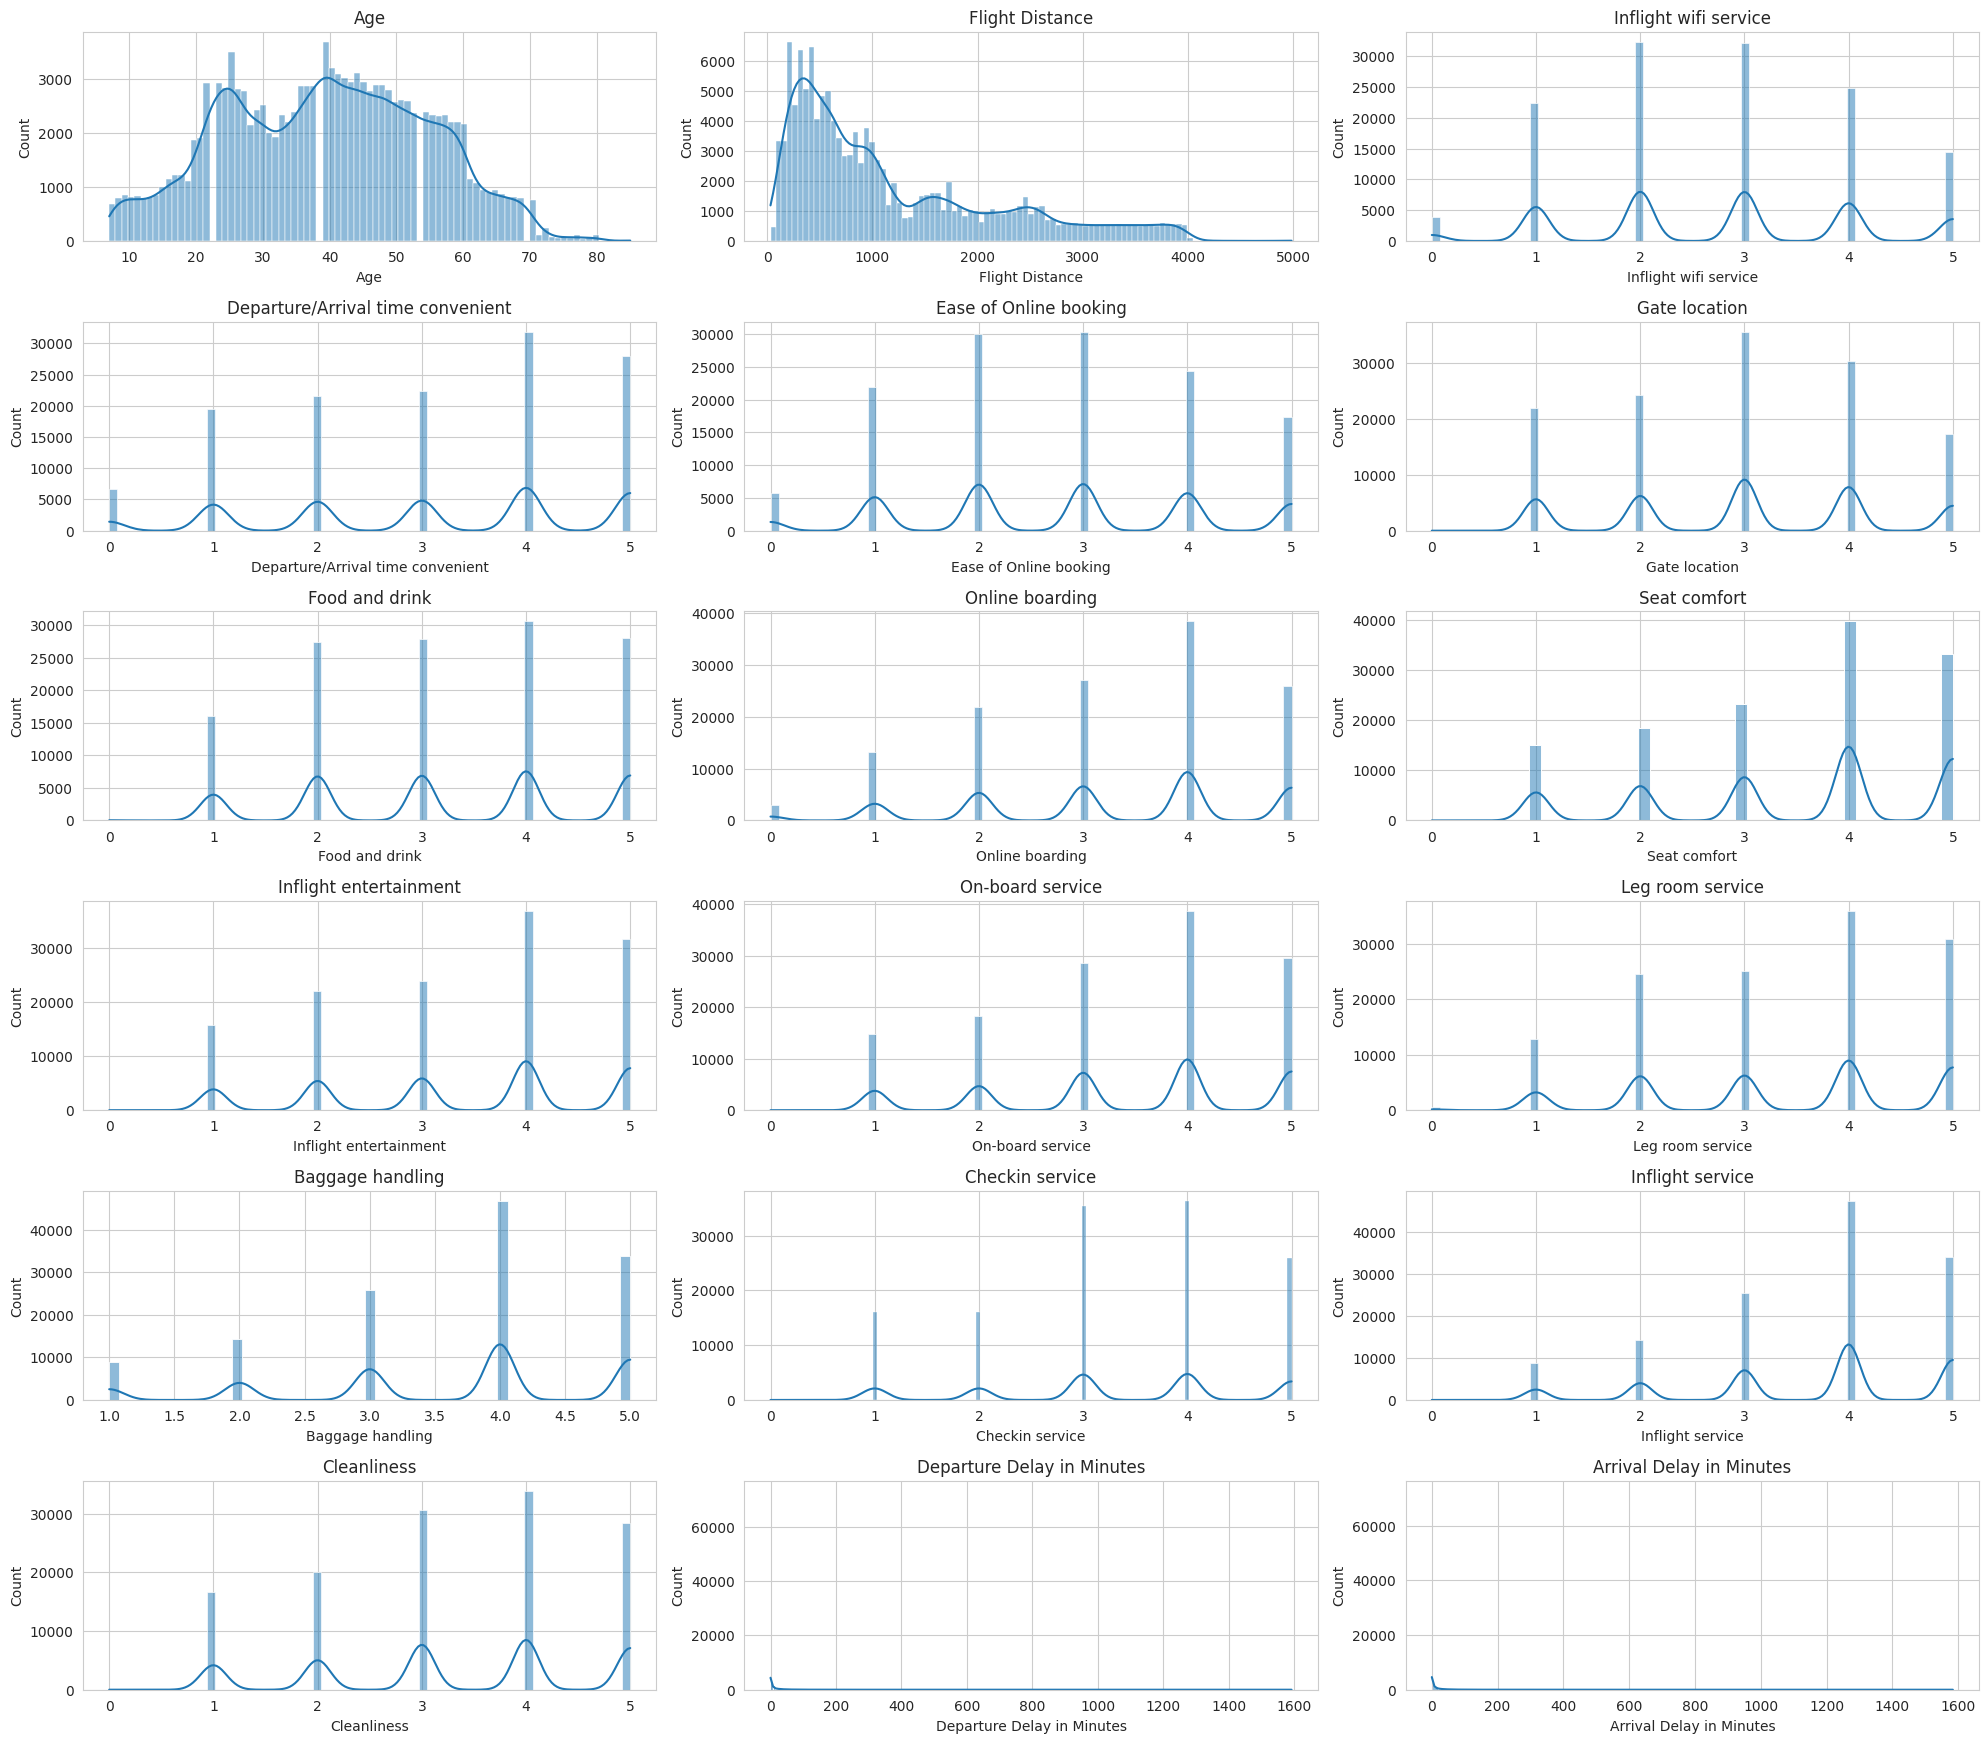

In [70]:
num_cols_per_row = 3
num_rows = len(num_cols) // num_cols_per_row + 1

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 20))

for i, col in enumerate(num_cols):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row

    ax = axes[row_index, col_index]
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(col)

# Deleting the empty graphs
for i in range(len(num_cols), num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [71]:
# Let's have a close look at the departure delay, arrival delay and flight distance graphs, where outliers exist

<Axes: ylabel='Departure Delay in Minutes'>

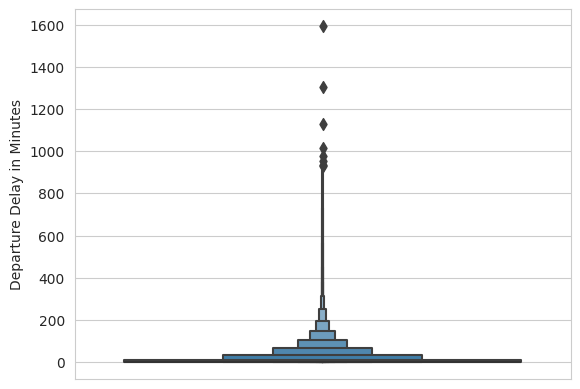

In [72]:
sns.boxenplot(data=df,y="Departure Delay in Minutes")

<Axes: ylabel='Arrival Delay in Minutes'>

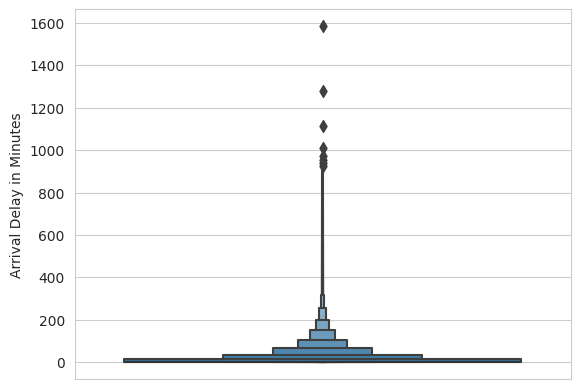

In [73]:
sns.boxenplot(data=df,y="Arrival Delay in Minutes")

<Axes: ylabel='Flight Distance'>

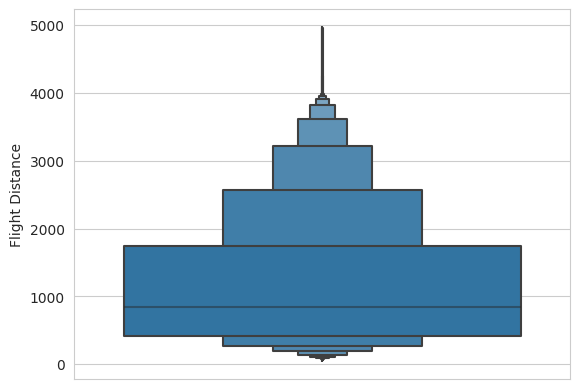

In [74]:
sns.boxenplot(data=df,y="Flight Distance")

In [75]:
#Now, let's see the same graphs with respect to satisfaction

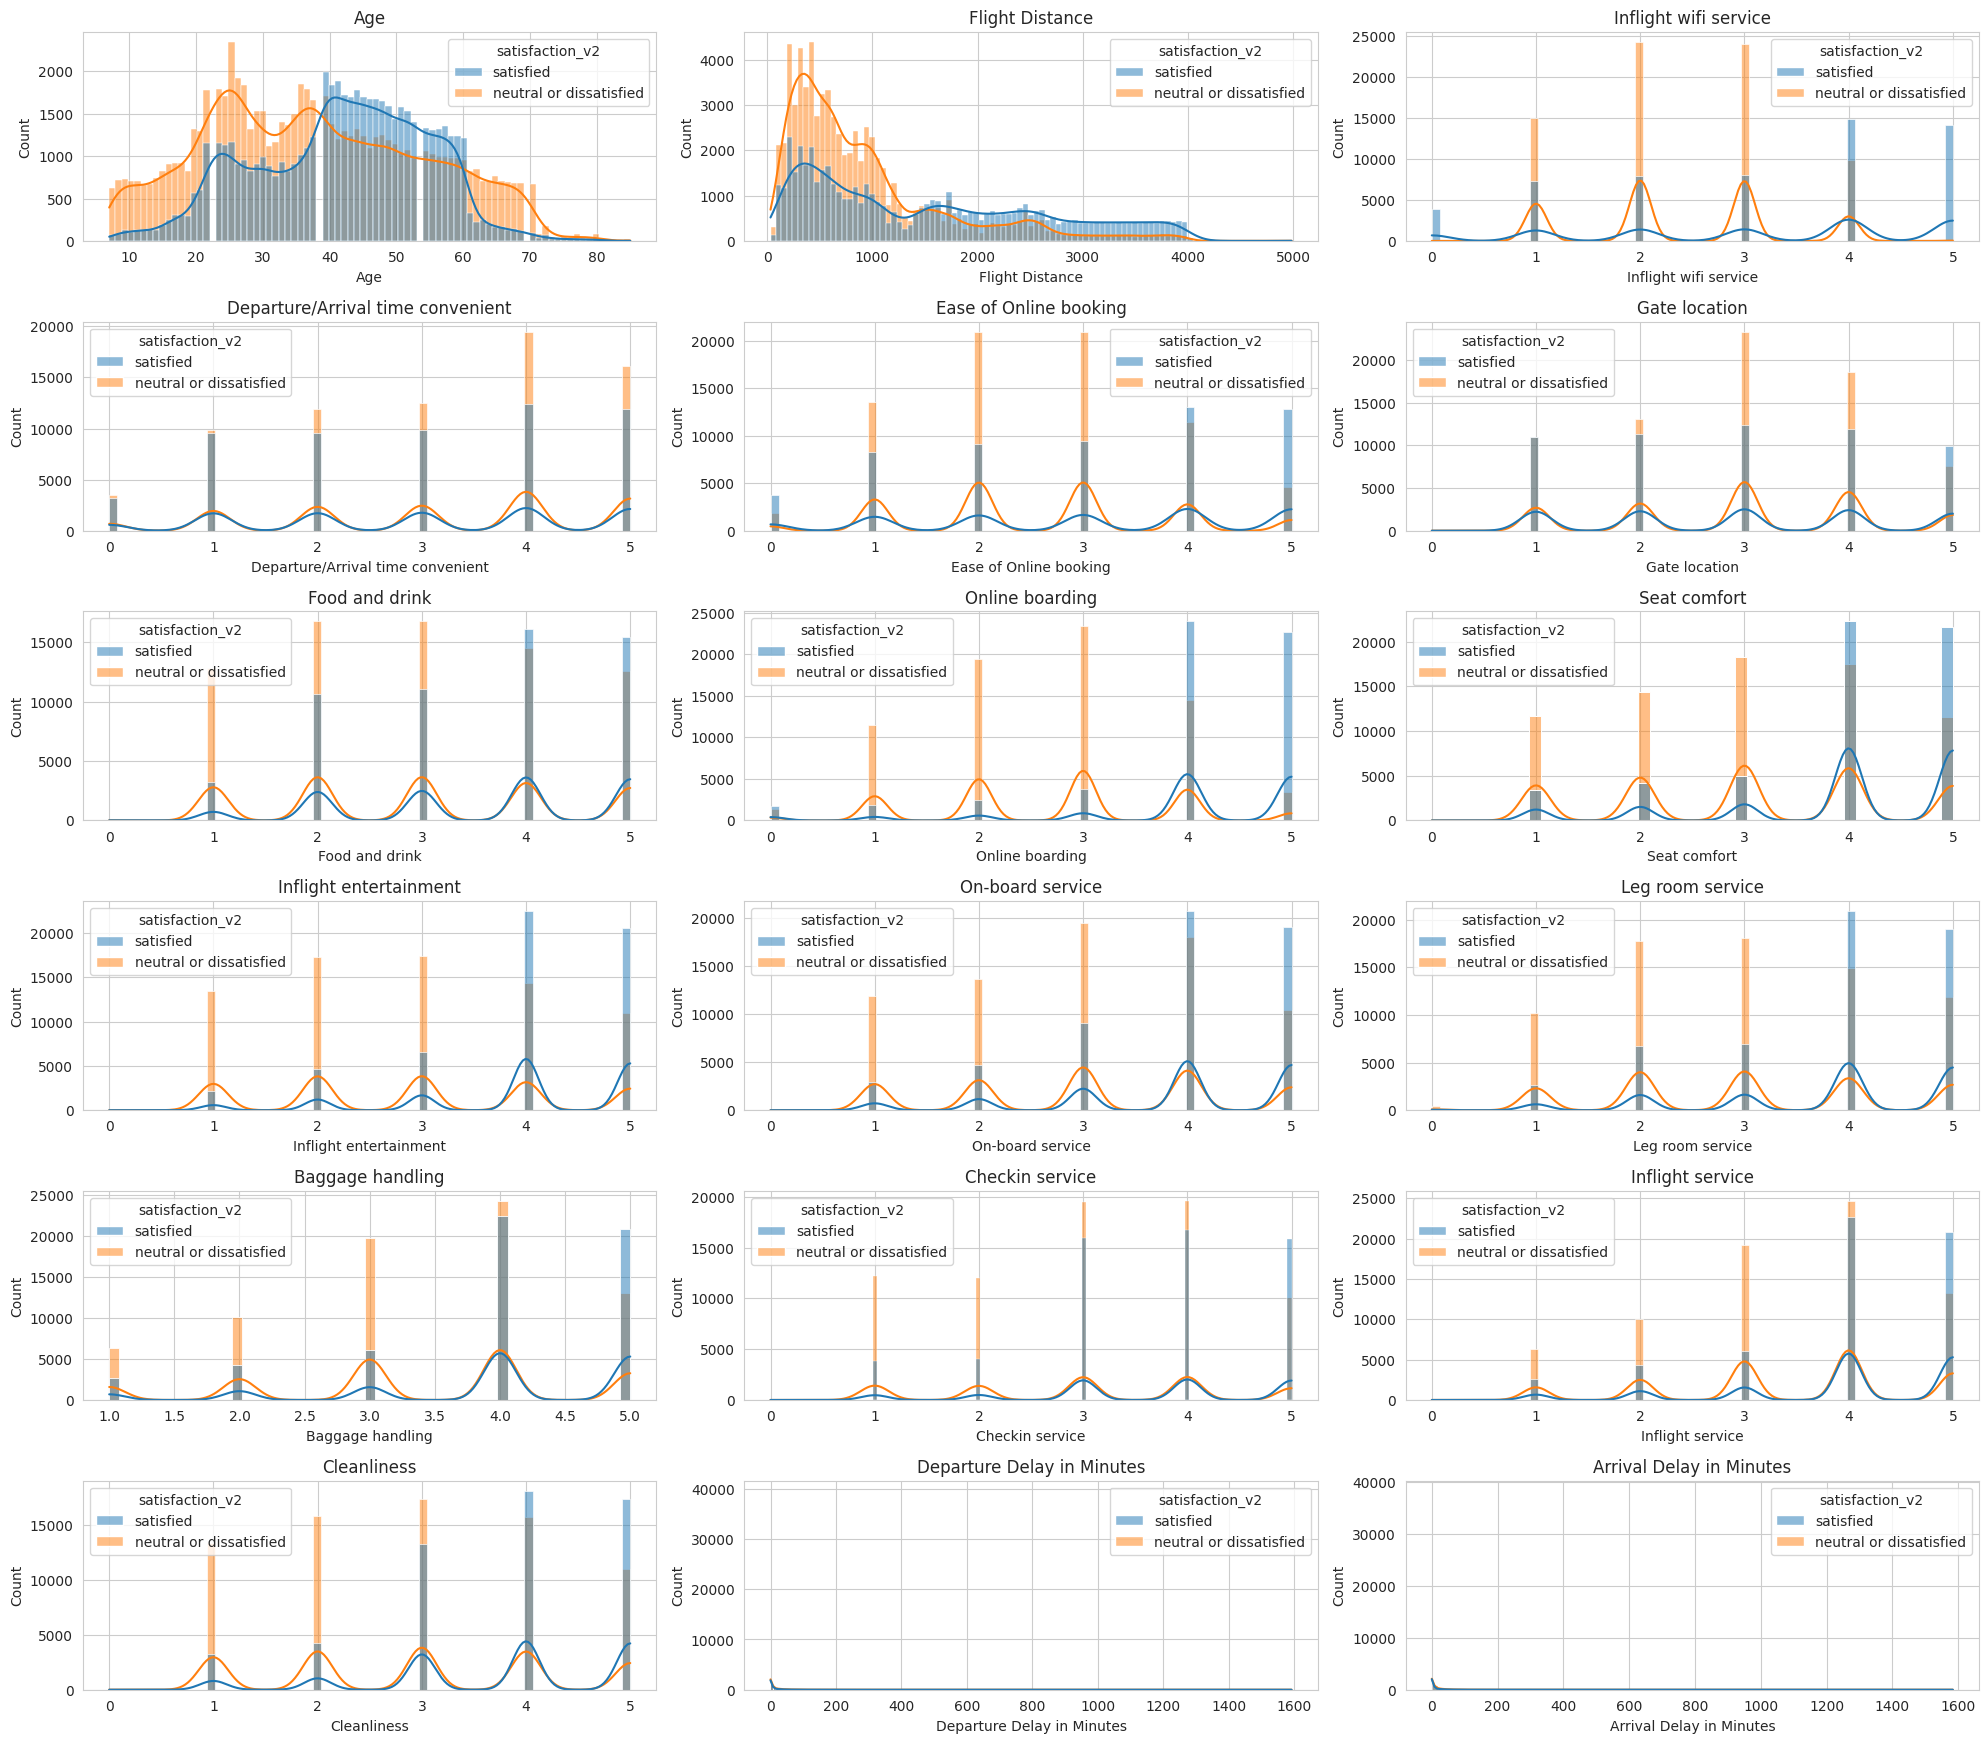

In [76]:
num_cols_per_row = 3
num_rows = len(num_cols) // num_cols_per_row + 1

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 20))

for i, col in enumerate(num_cols):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row

    ax = axes[row_index, col_index]
    sns.histplot(data=df, x=col, hue="satisfaction_v2", kde=True, ax=ax)
    ax.set_title(col)

# Deleting the empty graphs
for i in range(len(num_cols), num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [77]:
#General trend for the rating features in which the surveyed person gives score btw 0 to 5, can be seen like:
  #Satisfied passengers are generally dominant among the people giving 4 or 5 points to the rating features

<Axes: xlabel='satisfaction_v2', ylabel='Arrival Delay in Minutes'>

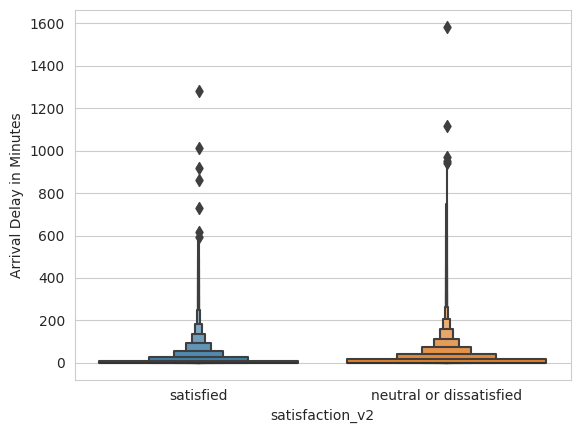

In [78]:
sns.boxenplot(data=df,y="Arrival Delay in Minutes", x="satisfaction_v2")

<Axes: xlabel='satisfaction_v2', ylabel='Departure Delay in Minutes'>

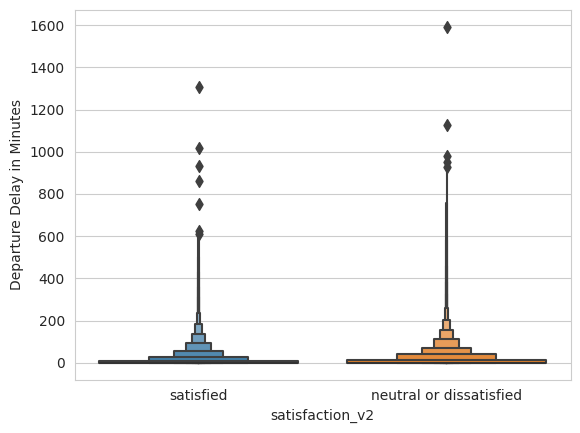

In [79]:
sns.boxenplot(data=df,y="Departure Delay in Minutes",x="satisfaction_v2")

<Axes: xlabel='satisfaction_v2', ylabel='Flight Distance'>

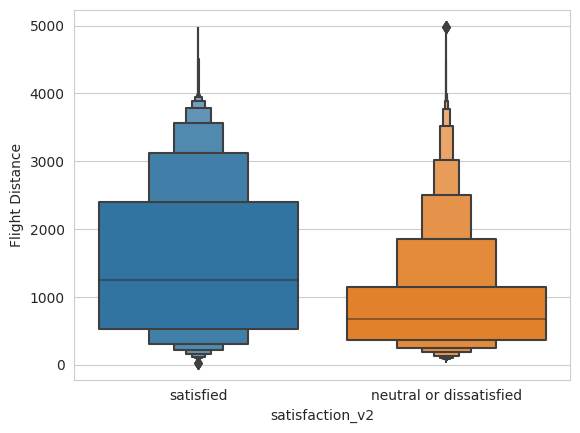

In [80]:
sns.boxenplot(data=df,y="Flight Distance",x="satisfaction_v2")

In [81]:
#What about satisfaction ?

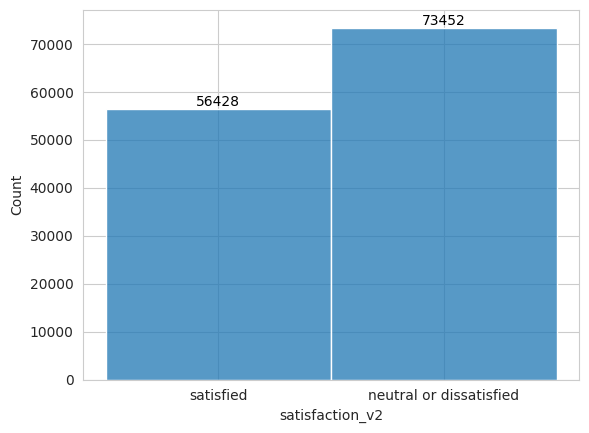

In [82]:
sns.histplot(data=df,x="satisfaction_v2")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

In [83]:
#Satisfaction distribution is balanced, which is good for modelling

In [84]:
#Let's check the distribution of categorical columns with respect to satisfaction

In [85]:
cat_cols

['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [86]:
target_col=["satisfaction_v2"]

In [87]:
cat_cols.remove("satisfaction_v2")

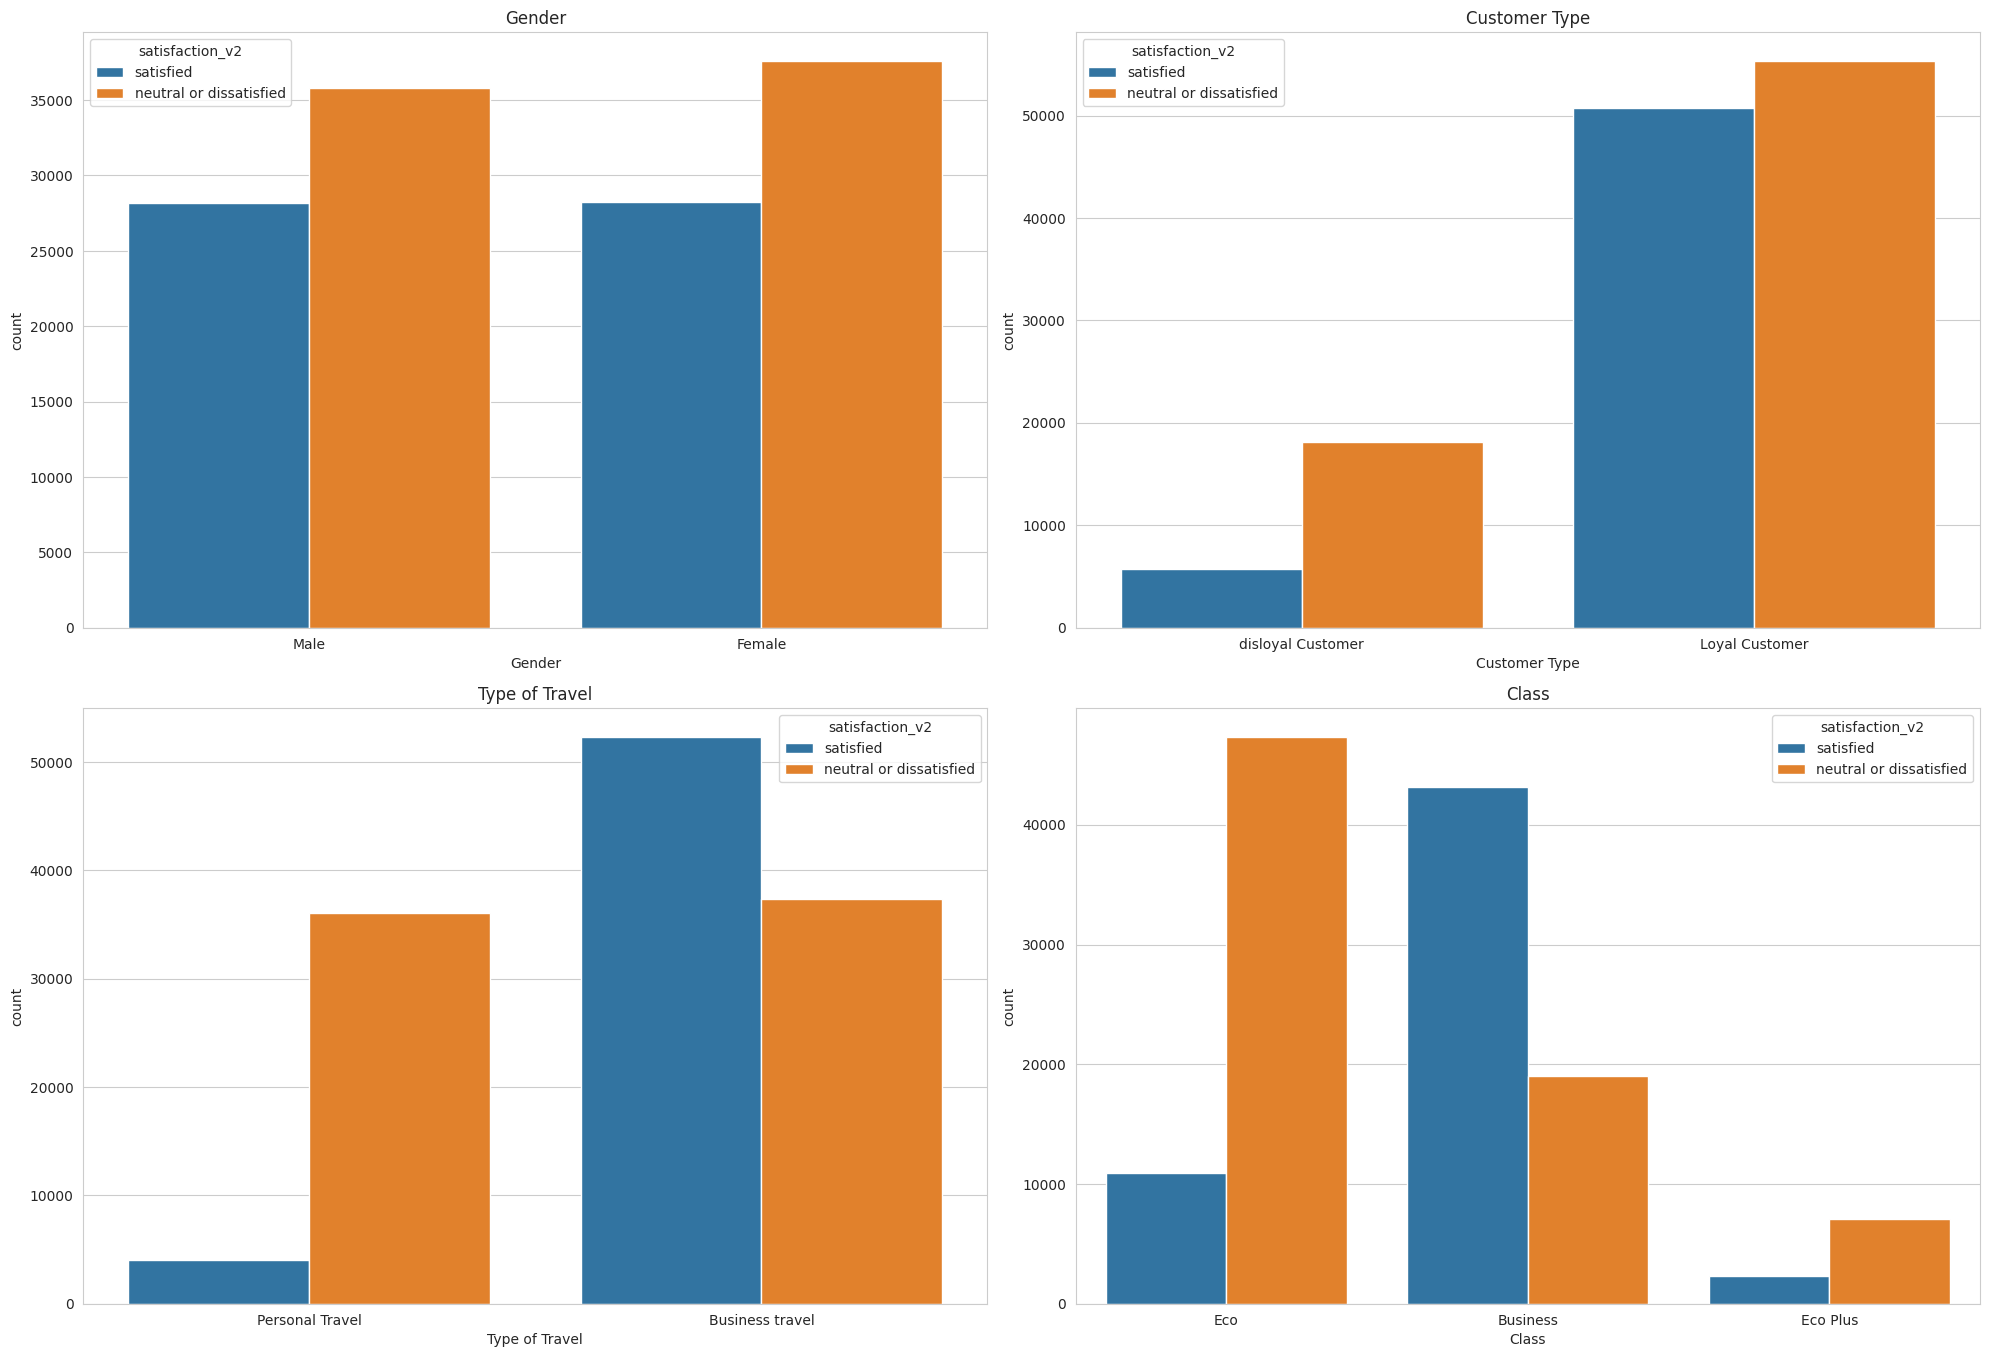

In [88]:
num_cols_per_row = 2
num_rows = len(cat_cols) // num_cols_per_row + 1

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 20))

for i, col in enumerate(cat_cols):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row

    ax = axes[row_index, col_index]
    sns.countplot(data=df, x=col, hue="satisfaction_v2", ax=ax)
    ax.set_title(col)

# Deleting the empty graphs
for i in range(len(cat_cols), num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [89]:
#above graphs shows us:
# 1) Satisfaction rate among genders is almost the same
# 2) Satisfaction rate of Loyal Customers is bigger than sat. rate of Disloyal Customers which makes sense
# 3) Satisfaction rate of people who travel for business is dramatically bigger people who travel with personal issues
# 4) Satisfaction rate of Business class passengers is dramatically bigger than the others which makes sense also

In [90]:
# I also want to look at the cross-feature relations to capture some insights

In [91]:
#First let's try to understand the persona of people having business travel

In [92]:
business_travel_df = df[df["Type of Travel"] == "Business travel"]

<Axes: xlabel='Age', ylabel='Count'>

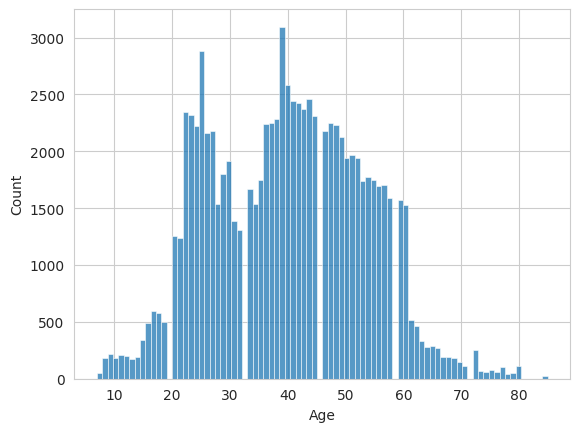

In [93]:
sns.histplot(data=business_travel_df,x="Age")

<Axes: xlabel='Age', ylabel='Count'>

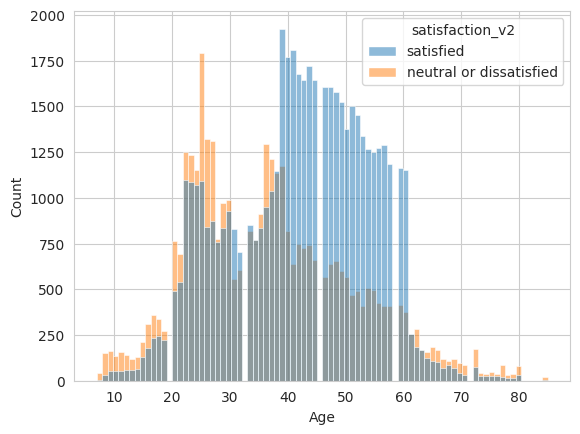

In [94]:

sns.histplot(data=business_travel_df,x="Age",hue="satisfaction_v2")

In [95]:
#The distribution is kind of similar to the normal Age vs satisfaction distribution, but it can be clearly seen that-
#- rate of satisfaction increased in the early ages.

#Some questions pop up when we check the above graph like how a 10-15 years old children can have a business purposed travel?
#The answer could be; being a professional athlete, or may be accompanying their parents

<Axes: xlabel='Class', ylabel='count'>

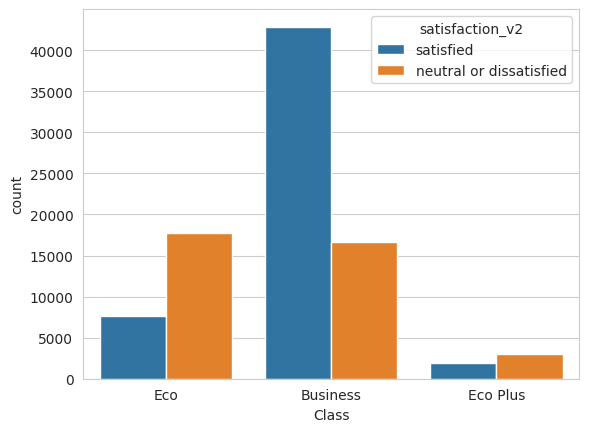

In [96]:
sns.countplot(data=business_travel_df,x="Class",hue="satisfaction_v2")

In [97]:
# They generaly prefer business class

In [98]:
# Let's remember the graph of age vs satisfaction graph

<Axes: xlabel='Age', ylabel='Count'>

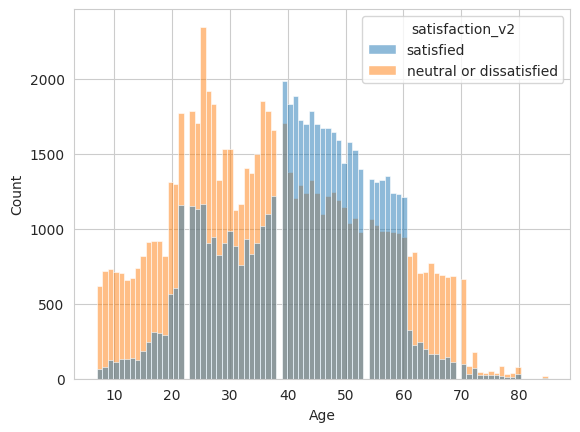

In [99]:
sns.histplot(data=df,x="Age",hue="satisfaction_v2")

In [100]:
#As we can see, the people with the age btw 40-60 are more likely to be satisfied.
#Now lets try to understand the insight behind the age distribution graph according to satisfaction.

In [101]:
df_btw_40to60=df[(df["Age"]<=60)& (df["Age"]>=40)]

<Axes: xlabel='Class', ylabel='count'>

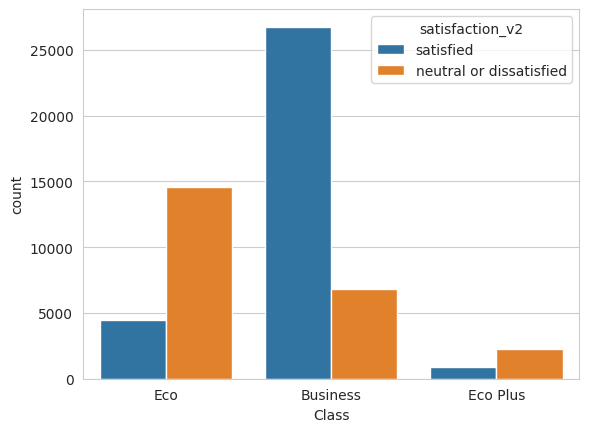

In [102]:
sns.countplot(data=df_btw_40to60,x="Class",hue="satisfaction_v2")

In [103]:
#in contrast to the normal class distribution, people with the age btw 40-60 are more likely to select business class

<Axes: xlabel='Type of Travel', ylabel='count'>

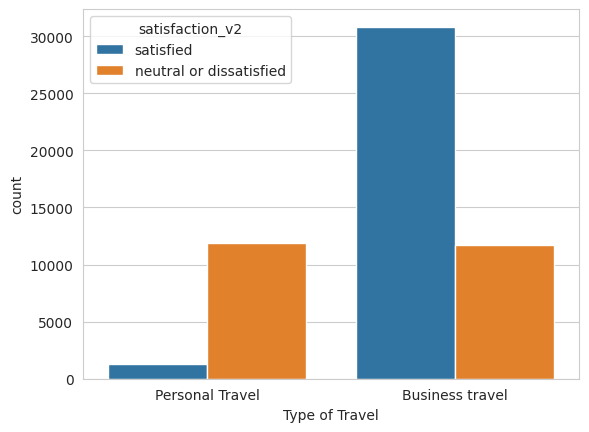

In [104]:
sns.countplot(data=df_btw_40to60,x="Type of Travel",hue="satisfaction_v2")

In [105]:
#And their general purpose to take a flight is business

### _Step 2.7 - Feature Extraction_

In [106]:
# Let's create a feature indicating whether the flight was delayed or not: 1 for delayed, 0 for not

In [107]:
df["Was_Delayed"]=df["Departure Delay in Minutes"].apply(lambda x: 1 if x>0 else 0)

In [108]:
df.tail(5)

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Was_Delayed
129875,satisfied,Female,Loyal Customer,35,Business travel,Business,2592,5,5,5,5,4,2,4,5,5,5,5,5,5,4,0,0.0,0
129876,satisfied,Female,Loyal Customer,11,Business travel,Eco,610,5,1,1,1,5,5,5,5,5,4,1,2,5,5,82,65.0,1
129877,satisfied,Male,Loyal Customer,46,Business travel,Business,86,1,1,1,1,5,5,5,5,1,3,1,5,2,2,0,0.0,0
129878,satisfied,Female,Loyal Customer,35,Business travel,Business,83,1,1,1,1,5,5,5,5,4,4,2,5,5,5,0,0.0,0
129879,satisfied,Female,Loyal Customer,47,Business travel,Business,3939,1,1,3,1,5,5,5,5,2,5,4,5,4,5,0,0.0,0


<ipython-input-109-0def2d1272c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


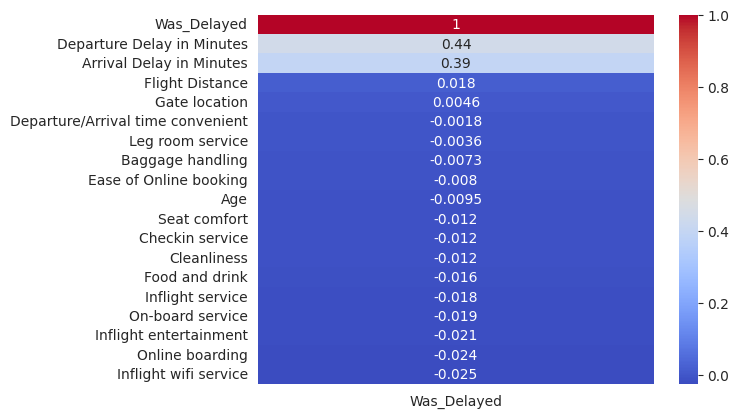

In [109]:
correlation_matrix = df.corr()
correlation_with_was_delayed = correlation_matrix["Was_Delayed"].sort_values(ascending=False)
sns.heatmap(correlation_with_was_delayed.to_frame(), annot=True, cmap="coolwarm")
plt.show()

### _Step 2.8 - One Hot Encoding_

In [110]:
# I will use a function to perform one hot encoding to the categorical columns and drop the raw variable columns.

In [111]:
# One_Hot_Encoder works with:
    # df: should be type of pandas.core.frame.DataFrame
    # to_be_encoded: should be type of either one of the following ["pandas.core.indexes.base.Index","list","tuple"]

def One_Hot_Encoder(df,to_be_encoded):

    ### Input variable checks & errors

    wrong_column_name=[]

    if isinstance(df, pd.core.frame.DataFrame)==False:
        print("The first variable is not a pandas data frame, please enter a pandas data frame")
        return

    if len(df)==0:
        print("The data frame is empty, please check your data frame.")
        return

    if len(to_be_encoded)==0:
        print("The list of columns, to be encoded, is empty. Please check your list.")
        return

    for i in to_be_encoded:
        if i not in df.columns.tolist():
            wrong_column_name.append(i)

    if len(wrong_column_name)>0:
        if len(wrong_column_name)==1:
            print("There is no such a column as: {}".format(wrong_column_name))
        if len(wrong_column_name)>1:
            print("There are no columns as: {}".format(wrong_column_name))
        return

    ### N-1 Cluster Encoding

    for i in to_be_encoded:
        dummies=pd.get_dummies(df[i],drop_first=True,prefix=i).astype(int)
        df=pd.concat([df,dummies],axis=1)
        df.drop(columns=i,inplace=True)

    print("encoded_df is prepared")
    return df

In [112]:
df=One_Hot_Encoder(df,cat_cols+target_col)

encoded_df is prepared


In [113]:
df.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Was_Delayed,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_v2_satisfied
0,56,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0,0,1,1,1,1,0,1
1,49,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0,0,1,1,1,1,0,1
2,55,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0,0,1,1,1,1,0,1
3,36,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0,0,0,1,1,1,0,1
4,55,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0,0,1,1,1,1,0,1


### _Step 2.9 - Correlation Inspection_

<Axes: >

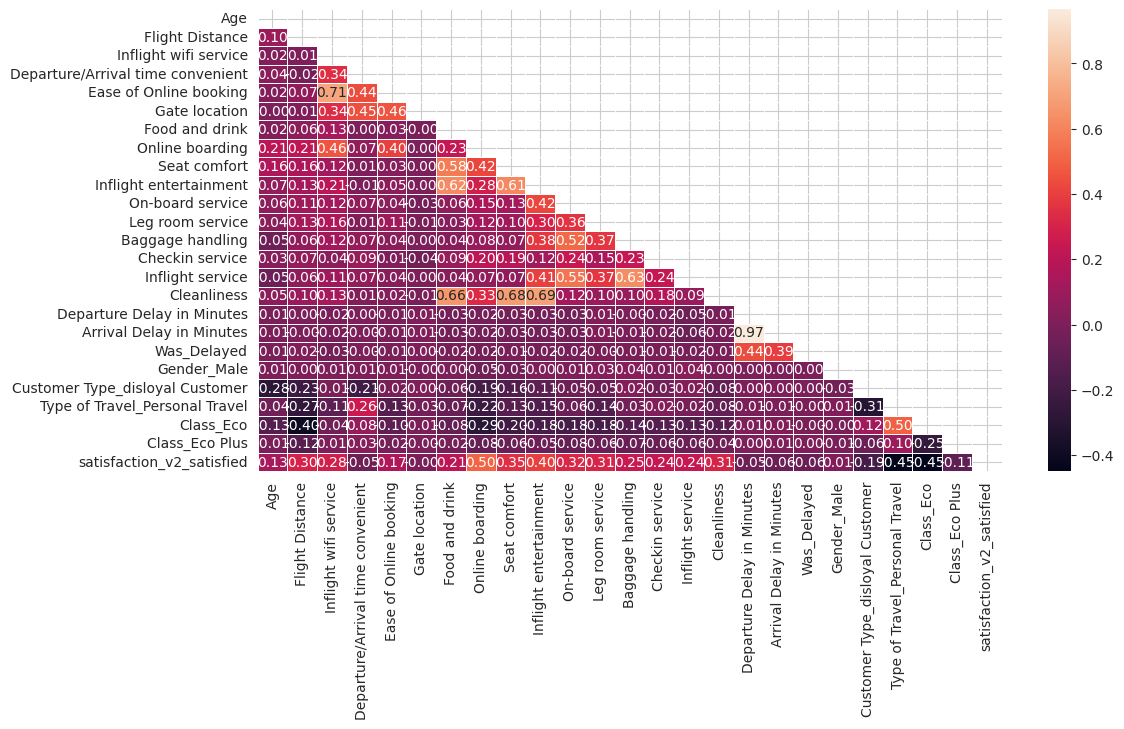

In [122]:
plt.figure(figsize=(12,6))
corr=df.corr(numeric_only=True)
below_triangle = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=corr,annot=True>0.3,fmt=".02f",linewidth=.5,mask=below_triangle)

<Axes: >

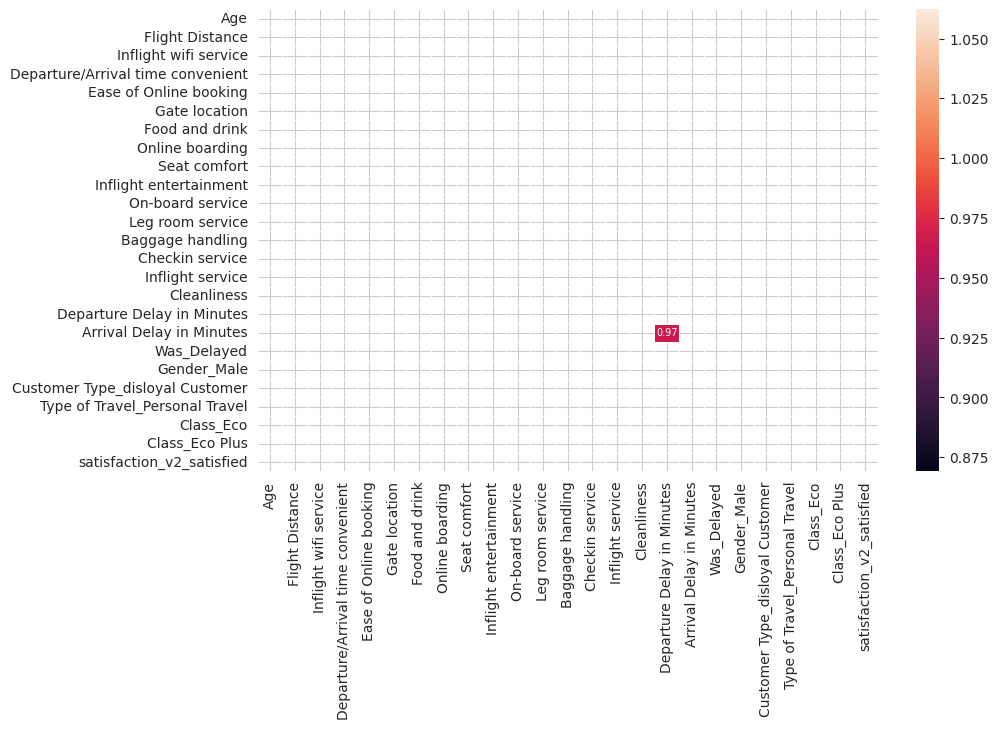

In [123]:
plt.figure(figsize=(10,6))
corr=df.corr(numeric_only=True)
threshold = 0.75
filtered_corr = corr[((corr >= threshold) | (corr <= -threshold)) & (corr != 1)]
below_triangle = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=filtered_corr,annot=True,fmt=".02f",linewidth=.5,mask=below_triangle,annot_kws={"fontsize": 7})


In [124]:
# Departure Delay in Minutes and Arrival Delay in Minutes may create a multicollinearity problem, which will be-
# -reduced to one parameter with PCA in the next steps.

### _Step 2.10 - Scaling the Dataset_

In [126]:
#Before model selection for the binary classification, lets prepare the standardized, normalized and-
#-reboust scaled versions of the dataset. We try them on step 3 and see how which one performs better.

In [127]:
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Was_Delayed,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_v2_satisfied
0,56,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0,0,1,1,1,1,0,1
1,49,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0,0,1,1,1,1,0,1
2,55,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0,0,1,1,1,1,0,1
3,36,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0,0,0,1,1,1,0,1
4,55,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,35,2592,5,5,5,5,4,2,4,5,5,5,5,5,5,4,0,0.0,0,0,0,0,0,0,1
129876,11,610,5,1,1,1,5,5,5,5,5,4,1,2,5,5,82,65.0,1,0,0,0,1,0,1
129877,46,86,1,1,1,1,5,5,5,5,1,3,1,5,2,2,0,0.0,0,1,0,0,0,0,1
129878,35,83,1,1,1,1,5,5,5,5,4,4,2,5,5,5,0,0.0,0,0,0,0,0,0,1


In [128]:
cols_to_be_scaled=[]
for i in df.columns:
    if df[i].nunique()!=2:
        cols_to_be_scaled.append(i)

print("Columns to be scaled are:",cols_to_be_scaled)

Columns to be scaled are: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [129]:
#Let me use a function as follows:

In [130]:
def Scaler(df,to_be_scaled,t="n"):

    # Input variable checks & errors

    wrong_column_name=[]

    if isinstance(df, pd.core.frame.DataFrame)==False:
        print("The first variable is not a pandas data frame, please enter a pandas data frame")
        return

    if len(df)==0:
        print("The data frame is empty, please check your data frame.")
        return

    if len(to_be_scaled)==0:
        print("The list of columns, to be scaled, is empty. Please check your list.")
        return

    for i in to_be_scaled:
        if i not in df.columns.tolist():
            wrong_column_name.append(i)

    if len(wrong_column_name)>0:
        if len(wrong_column_name)==1:
            print("There is no such a column as: {}".format(wrong_column_name))
        if len(wrong_column_name)>1:
            print("There are no columns as: {}".format(wrong_column_name))
        return

    if t.lower()!="n" and t.lower()!="s" and t.lower()!="rs":
        print("Please put the third input as N, S or RS for Normalization, Standardization and Robust Scaler respectively")
        return

    # Importing necessary models

    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import RobustScaler

    # Scaling

    new_df=df.copy()

    if t.lower()=="n":
        model=MinMaxScaler()
        for i in to_be_scaled:
            new_df[i]=model.fit_transform(new_df[[i]])
        print("Normalized df is prepared")

    elif t.lower()=="rs":
        model=RobustScaler()
        for i in to_be_scaled:
            new_df[i]=model.fit_transform(new_df[[i]])
        print("Robust Scaled df is prepared")

    else:
        model=StandardScaler()
        for i in to_be_scaled:
            new_df[i]=model.fit_transform(new_df[[i]])
        print("Standardized df is prepared")

    return new_df

In [131]:
df_s=Scaler(df,cols_to_be_scaled,"S")
#df_s stands for df_standardized

df_n=Scaler(df,cols_to_be_scaled,"N")
#df_n stands for df_normalized

df_rs=Scaler(df,cols_to_be_scaled,"RS")
#df_n stands for df_robust_scaled

Standardized df is prepared
Normalized df is prepared
Robust Scaled df is prepared


## __Step 3 - Model-DataSet Selection__

### _Step 3.1 - Train-Validation-Test Split_

In [ ]:
from sklearn.model_selection import train_test_split

In [132]:
#X_s, X_n and X_rs stand for the X_standardized, X_normalized and X_robust_scaled respectively.
#X_r will be indicating X_raw

y=df["satisfaction_v2_satisfied"]
X_s=df_s.drop("satisfaction_v2_satisfied",axis=1)
X_n=df_n.drop("satisfaction_v2_satisfied",axis=1)
X_rs=df_rs.drop("satisfaction_v2_satisfied",axis=1)
X_r=df.drop("satisfaction_v2_satisfied",axis=1)

In [135]:
#For standardized dataset:
X_s_train, X_s_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, stratify=y, random_state=42)
X_s_train, X_s_val, y_train, y_val = train_test_split(X_s_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

#For normalized dataset
X_n_train, X_n_test, y_train, y_test = train_test_split(X_n, y, test_size=0.2, stratify=y, random_state=42)
X_n_train, X_n_val, y_train, y_val = train_test_split(X_n_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

#For robust scaled dataset
X_rs_train, X_rs_test, y_train, y_test = train_test_split(X_rs, y, test_size=0.2, stratify=y, random_state=42)
X_rs_train, X_rs_val, y_train, y_val = train_test_split(X_rs_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

#For raw dataset:
X_r_train, X_r_test, y_train, y_test = train_test_split(X_r, y, test_size=0.2, stratify=y, random_state=42)
X_r_train, X_r_val, y_train, y_val = train_test_split(X_r_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [134]:
# We have divided X_n, X_s and Y datasets into Train, Validation and Test samples with the ratio of-
# 60% , 20% and 20% respectively.
# The same random_state and ratios were used for different scaling methods in order to compare them fairly.

### _Step 3.2 - Model Selection_

#### _Step 3.2.1 - With Normalized Data_

##### _Step 3.2.1.1 - Standard Models_

In [139]:
#Importing necessary libraries

In [140]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [141]:
# First, we determine the top 5 models with only normalized X data set.
# Then, we will see how the standardized and normalized datasets performs with these-
# -top models.

In [142]:
#Let's train the ready models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Bagging Classifier", BaggingClassifier()),
    ("Passive Aggressive", PassiveAggressiveClassifier()),
    ("Perceptron", Perceptron()),
    ("Ridge Classifier", RidgeClassifier()),
    ("SGD Classifier", SGDClassifier()),
    ("Calibrated Classifier", CalibratedClassifierCV()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier()),
    ("CatBoost", CatBoostClassifier())
]

# Creating a data frame to hold the accuracy scores and confusion matrices
results = []

# Training each model and recording the results of validation dataset
for model_name, model in models:
    model.fit(X_n_train, y_train)
    y_pred = model.predict(X_n_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    results.append((model_name, accuracy, report))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 33857, number of negative: 44071
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 77928, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434465 -> initscore=-0.263656
[LightGBM] [Info] Start training from score -0.263656
Learning rate set to 0.066174
0:	learn: 0.6046222	total: 71.2ms	remaining: 1m 11s
1:	learn: 0.5332932	total: 91.5ms	remaining: 45.7s
2:	learn: 0.4527574	total: 113ms	remaining: 37.5s
3:	learn: 0.4087076	total: 133ms	remaining: 33.2s
4:	learn: 0.3681370	total: 155ms	remaining: 30.8s
5:	learn: 0.3318007	total: 175ms	remaining: 29.1s
6:	learn: 0.3114709	total: 

In [144]:
# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy", "Classification Report"])
top_models_df.drop(columns=["Classification Report"], inplace=True)
print(top_models_df)

# Printing the classification reports separately
print("\nClassification Reports:")
print("\n")
for model_name, _, report in top_models:
    report_dict = report
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"{model_name} Classification Report:")
    print(report_df)
    print("\n")

Top 5 Models' Metrics:
           Model  Accuracy
0       CatBoost  0.963697
1       LightGBM  0.963312
2        XGBoost  0.962927
3  Random Forest  0.961888
4    Extra Trees  0.959386

Classification Reports:


CatBoost Classification Report:
              precision    recall  f1-score       support
0              0.958940  0.977673  0.968216  14691.000000
1              0.970176  0.945503  0.957681  11285.000000
accuracy       0.963697  0.963697  0.963697      0.963697
macro avg      0.964558  0.961588  0.962948  25976.000000
weighted avg   0.963821  0.963697  0.963639  25976.000000


LightGBM Classification Report:
              precision    recall  f1-score       support
0              0.955988  0.980260  0.967972  14691.000000
1              0.973424  0.941249  0.957066  11285.000000
accuracy       0.963312  0.963312  0.963312      0.963312
macro avg      0.964706  0.960755  0.962519  25976.000000
weighted avg   0.963563  0.963312  0.963234  25976.000000


XGBoost Classification R

In [154]:
# Now, let's see the performance of these trained models on training set

In [146]:
# Creating a data frame to hold the accuracy scores
results = []

for model_name, model in models:
    y_pred = model.predict(X_n_train)
    accuracy = accuracy_score(y_train, y_pred)
    results.append((model_name, accuracy))

# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy"])
print(top_models_df)

Top 5 Models' Metrics:
                Model  Accuracy
0       Random Forest  1.000000
1       Decision Tree  1.000000
2         Extra Trees  1.000000
3  Bagging Classifier  0.996818
4            CatBoost  0.976157


In [147]:
#Insights:
  #When we compare the results on validation and train set we can see that, CatBoost has 0.978 accuracy
  #-on trainset, 0.964 on validation set. However, RandomForest model has 1.00 accuracy on train-
  #-and 0.962 on validation set. These results are showing the the variance of randomforest is bigger-
  #-than the variance of Catboost while the bias of randomforest is smaller comparively which is zero.

##### _Step 3.2.1.2 - ANN Modelling_

In [148]:
#Importing necessary tensorflow functions

In [149]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [150]:
np.random.seed(42)
tf.random.set_seed(42)

In [151]:
# And as the last model, let's create an ANN with tf and keras

# "We will use linear as an activation function on the unit of output layer with loss function having from_logits=True-
# -in order to reduce the computational errors" Andrew Ng
model_tf = Sequential([
    Dense(units=256,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=64,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=16,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=4,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=1,activation="linear")
])

model_tf.compile(loss=BinaryCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_tf.fit(X_n_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_tf = (model_tf.predict(X_n_val) > 0.5).astype(int)
accuracy_tf = accuracy_score(y_val, y_pred_tf)

812/812 [==============================] - 2s 2ms/step


In [152]:
print("Accuracy on validation set:",accuracy_tf)
print("Classification report on validation set:")
print("\n")
print(classification_report(y_val, y_pred_tf))

0.9384816753926701
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14691
           1       0.97      0.89      0.93     11285

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [153]:
y_pred_tf = (model_tf.predict(X_n_train) > 0.5).astype(int)
accuracy_tf = accuracy_score(y_train, y_pred_tf)
print("Accuracy on train set:",accuracy_tf)

2436/2436 [==============================] - 6s 3ms/step
Accuracy on train set: 0.9368263012011088


In [ ]:
#Insights:
  #ANN model has also a very succesful result which is 0.937 accuracy on training set and 0.938 on val set.
  #The variance is almost zero and the bias is kind of acceptable but not better then the boosted decision tree models.

#### _Step 3.2.2 - With Standardized Data_

##### _Step3.2.2.1 Standard Models_

In [155]:
#Let's train the ready models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Bagging Classifier", BaggingClassifier()),
    ("Passive Aggressive", PassiveAggressiveClassifier()),
    ("Perceptron", Perceptron()),
    ("Ridge Classifier", RidgeClassifier()),
    ("SGD Classifier", SGDClassifier()),
    ("Calibrated Classifier", CalibratedClassifierCV()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier()),
    ("CatBoost", CatBoostClassifier())
]

# Creating a data frame to hold the accuracy scores and confusion matrices
results = []

# Training each model and recording the results
for model_name, model in models:
    model.fit(X_s_train, y_train)
    y_pred = model.predict(X_s_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    results.append((model_name, accuracy, report))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 33857, number of negative: 44071
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 77928, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434465 -> initscore=-0.263656
[LightGBM] [Info] Start training from score -0.263656
Learning rate set to 0.066174
0:	learn: 0.6046222	total: 21.6ms	remaining: 21.6s
1:	learn: 0.5332932	total: 41.6ms	remaining: 20.8s
2:	learn: 0.4527574	total: 63ms	remaining: 20.9s
3:	learn: 0.4087076	total: 84.3ms	remaining: 21s
4:	learn: 0.3681370	total: 106ms	remaining: 21s
5:	learn: 0.3318007	total: 127ms	remaining: 21s
6:	learn: 0.3114709	total: 148ms	r

In [156]:
# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy", "Classification Report"])
top_models_df.drop(columns=["Classification Report"], inplace=True)
print(top_models_df)

# Printing the classification reports separately
print("\nClassification Reports:")
print("\n")
for model_name, _, report in top_models:
    report_dict = report
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"{model_name} Classification Report:")
    print(report_df)
    print("\n")

Top 5 Models' Metrics:
           Model  Accuracy
0       LightGBM  0.963813
1       CatBoost  0.963697
2        XGBoost  0.962927
3  Random Forest  0.962042
4    Extra Trees  0.959655

Classification Reports:


LightGBM Classification Report:
              precision    recall  f1-score       support
0              0.956631  0.980464  0.968401  14691.000000
1              0.973716  0.942136  0.957665  11285.000000
accuracy       0.963813  0.963813  0.963813      0.963813
macro avg      0.965174  0.961300  0.963033  25976.000000
weighted avg   0.964053  0.963813  0.963737  25976.000000


CatBoost Classification Report:
              precision    recall  f1-score       support
0              0.958940  0.977673  0.968216  14691.000000
1              0.970176  0.945503  0.957681  11285.000000
accuracy       0.963697  0.963697  0.963697      0.963697
macro avg      0.964558  0.961588  0.962948  25976.000000
weighted avg   0.963821  0.963697  0.963639  25976.000000


XGBoost Classification R

In [157]:
# Now, let's see the performance of these trained models on training set

In [158]:
# Creating a data frame to hold the accuracy scores
results = []

for model_name, model in models:
    y_pred = model.predict(X_s_train)
    accuracy = accuracy_score(y_train, y_pred)
    results.append((model_name, accuracy))

# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy"])
print(top_models_df)

Top 5 Models' Metrics:
                Model  Accuracy
0       Decision Tree  1.000000
1         Extra Trees  1.000000
2       Random Forest  0.999987
3  Bagging Classifier  0.996676
4            CatBoost  0.976157


In [191]:
# Insights:
  # 1) When we change the scaling method from normalization(min-max) to standardization(z-score), the accuracy of
  # -LightGBM on validation set has increased from 0.9633 to 0.9638, while Catboost's stays the same on 0.9637
  # 2) The comparison btw random forest and catboost stayed the same

##### _Step 3.2.2.2 - ANN Modelling_

In [159]:
np.random.seed(42)
tf.random.set_seed(42)

In [160]:
# And as the last model, let's create an ANN with tf and keras
model_tf = Sequential([
    Dense(units=256,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=64,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=16,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=4,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=1,activation="linear")
])

model_tf.compile(loss=BinaryCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_tf.fit(X_s_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_tf = (model_tf.predict(X_s_val) > 0.5).astype(int)
accuracy_tf = accuracy_score(y_val, y_pred_tf)

812/812 [==============================] - 1s 2ms/step


In [161]:
print("Accuracy on validation set:",accuracy_tf)
print("Classification report on validation set:")
print("\n")
print(classification_report(y_val, y_pred_tf))

Accuracy on validation set: 0.9422543886664614
Classification report on validation set:


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14691
           1       0.96      0.90      0.93     11285

    accuracy                           0.94     25976
   macro avg       0.95      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [162]:
y_pred_tf = (model_tf.predict(X_s_train) > 0.5).astype(int)
accuracy_tf = accuracy_score(y_train, y_pred_tf)
print("Accuracy on train set:",accuracy_tf)

2436/2436 [==============================] - 5s 2ms/step
Accuracy on train set: 0.9406246791910482


In [ ]:
#Insights:
  #When we change the scaling method to standardization the accuracy on both training and val sets increased
  #The variance has also increased and the bias is still kind of acceptable but not better then the boosted decision tree models.

#### _Step 3.2.3 - With Robust Scaled Data_

##### _Step 3.2.3.1 - Standard Models_

In [163]:
#Let's train the ready models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Bagging Classifier", BaggingClassifier()),
    ("Passive Aggressive", PassiveAggressiveClassifier()),
    ("Perceptron", Perceptron()),
    ("Ridge Classifier", RidgeClassifier()),
    ("SGD Classifier", SGDClassifier()),
    ("Calibrated Classifier", CalibratedClassifierCV()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier()),
    ("CatBoost", CatBoostClassifier())
]

# Creating a data frame to hold the accuracy scores and confusion matrices
results = []

# Training each model and recording the results
for model_name, model in models:
    model.fit(X_rs_train, y_train)
    y_pred = model.predict(X_rs_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    results.append((model_name, accuracy, report))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 33857, number of negative: 44071
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 77928, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434465 -> initscore=-0.263656
[LightGBM] [Info] Start training from score -0.263656
Learning rate set to 0.066174
0:	learn: 0.6046222	total: 57.8ms	remaining: 57.7s
1:	learn: 0.5332932	total: 88.7ms	remaining: 44.3s
2:	learn: 0.4527574	total: 138ms	remaining: 45.7s
3:	learn: 0.4087076	total: 195ms	remaining: 48.5s
4:	learn: 0.3681370	total: 241ms	remaining: 48s
5:	learn: 0.3318007	total: 295ms	remaining: 48.8s
6:	learn: 0.3114709	total: 350

In [164]:
# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy", "Classification Report"])
top_models_df.drop(columns=["Classification Report"], inplace=True)
print(top_models_df)

# Printing the classification reports separately
print("\nClassification Reports:")
print("\n")
for model_name, _, report in top_models:
    report_dict = report
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"{model_name} Classification Report:")
    print(report_df)
    print("\n")

Top 5 Models' Metrics:
           Model  Accuracy
0       CatBoost  0.963697
1       LightGBM  0.963081
2        XGBoost  0.962927
3  Random Forest  0.962080
4    Extra Trees  0.959655

Classification Reports:


CatBoost Classification Report:
              precision    recall  f1-score       support
0              0.958940  0.977673  0.968216  14691.000000
1              0.970176  0.945503  0.957681  11285.000000
accuracy       0.963697  0.963697  0.963697      0.963697
macro avg      0.964558  0.961588  0.962948  25976.000000
weighted avg   0.963821  0.963697  0.963639  25976.000000


LightGBM Classification Report:
              precision    recall  f1-score       support
0              0.955547  0.980328  0.967779  14691.000000
1              0.973496  0.940629  0.956780  11285.000000
accuracy       0.963081  0.963081  0.963081      0.963081
macro avg      0.964521  0.960479  0.962280  25976.000000
weighted avg   0.963345  0.963081  0.963001  25976.000000


XGBoost Classification R

In [165]:
# Now, let's see the performance of these trained models on training set

In [166]:
# Creating a data frame to hold the accuracy scores
results = []

for model_name, model in models:
    y_pred = model.predict(X_rs_train)
    accuracy = accuracy_score(y_train, y_pred)
    results.append((model_name, accuracy))

# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy"])
print(top_models_df)

Top 5 Models' Metrics:
                Model  Accuracy
0       Decision Tree  1.000000
1         Extra Trees  1.000000
2       Random Forest  0.999987
3  Bagging Classifier  0.996676
4            CatBoost  0.976157


In [ ]:
# Insights:
  # 1) When we work with robust scaled dataset, the best accuracy belongs to CatBoost again just like for the normalized dataset.
  # 2) LightGBM's score decreased a little bit but has the second place on accuracy
  # 3) The comparison btw random forest and catboost stayed the same

##### _Step 3.2.3.2 - ANN Modelling_

In [167]:
np.random.seed(42)
tf.random.set_seed(42)

In [168]:
# And as the last model, let's create an ANN with tf and keras
model_tf = Sequential([
    Dense(units=256,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=64,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=16,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=4,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=1,activation="linear")
])

model_tf.compile(loss=BinaryCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_tf.fit(X_rs_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_tf = (model_tf.predict(X_rs_val) > 0.5).astype(int)
accuracy_tf = accuracy_score(y_val, y_pred_tf)

812/812 [==============================] - 2s 2ms/step


In [169]:
print("Accuracy on validation set:",accuracy_tf)
print("Classification report on validation set:")
print("\n")
print(classification_report(y_val, y_pred_tf))

Accuracy on validation set: 0.9441407453033569
Classification report on validation set:


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     14691
           1       0.97      0.90      0.93     11285

    accuracy                           0.94     25976
   macro avg       0.95      0.94      0.94     25976
weighted avg       0.95      0.94      0.94     25976



In [170]:
y_pred_tf = (model_tf.predict(X_rs_train) > 0.5).astype(int)
accuracy_tf = accuracy_score(y_train, y_pred_tf)
print("Accuracy on train set:",accuracy_tf)

2436/2436 [==============================] - 4s 2ms/step
Accuracy on train set: 0.9411893029463094


In [192]:
#Insights:
  #When we change the scaling method to robust scaling the accuracy on both training and val sets slighly increased again.
  #However, the ANN model is still behind the boosing tree models.

#### _Step 3.2.4 - With Raw Data_

##### _Step 3.2.4.1 - Standard Models_

In [171]:
#Let's train the ready models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Bagging Classifier", BaggingClassifier()),
    ("Passive Aggressive", PassiveAggressiveClassifier()),
    ("Perceptron", Perceptron()),
    ("Ridge Classifier", RidgeClassifier()),
    ("SGD Classifier", SGDClassifier()),
    ("Calibrated Classifier", CalibratedClassifierCV()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier()),
    ("CatBoost", CatBoostClassifier())
]

# Creating a data frame to hold the accuracy scores and confusion matrices
results = []

# Training each model and recording the results
for model_name, model in models:
    model.fit(X_r_train, y_train)
    y_pred = model.predict(X_r_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    results.append((model_name, accuracy, report))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 33857, number of negative: 44071
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 77928, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434465 -> initscore=-0.263656
[LightGBM] [Info] Start training from score -0.263656
Learning rate set to 0.066174
0:	learn: 0.6046222	total: 21.1ms	remaining: 21.1s
1:	learn: 0.5332932	total: 40.8ms	remaining: 20.3s
2:	learn: 0.4527574	total: 66.6ms	remaining: 22.1s
3:	learn: 0.4087076	total: 87.3ms	remaining: 21.7s
4:	learn: 0.3681370	total: 108ms	remaining: 21.6s
5:	learn: 0.3318007	total: 129ms	remaining: 21.4s
6:	learn: 0.3114709	total:

In [172]:
# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy", "Classification Report"])
top_models_df.drop(columns=["Classification Report"], inplace=True)
print(top_models_df)

# Printing the classification reports separately
print("\nClassification Reports:")
print("\n")
for model_name, _, report in top_models:
    report_dict = report
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"{model_name} Classification Report:")
    print(report_df)
    print("\n")

Top 5 Models' Metrics:
           Model  Accuracy
0       CatBoost  0.963697
1       LightGBM  0.963312
2        XGBoost  0.962927
3  Random Forest  0.962080
4    Extra Trees  0.959655

Classification Reports:


CatBoost Classification Report:
              precision    recall  f1-score       support
0              0.958940  0.977673  0.968216  14691.000000
1              0.970176  0.945503  0.957681  11285.000000
accuracy       0.963697  0.963697  0.963697      0.963697
macro avg      0.964558  0.961588  0.962948  25976.000000
weighted avg   0.963821  0.963697  0.963639  25976.000000


LightGBM Classification Report:
              precision    recall  f1-score       support
0              0.955988  0.980260  0.967972  14691.000000
1              0.973424  0.941249  0.957066  11285.000000
accuracy       0.963312  0.963312  0.963312      0.963312
macro avg      0.964706  0.960755  0.962519  25976.000000
weighted avg   0.963563  0.963312  0.963234  25976.000000


XGBoost Classification R

In [173]:
# Now, let's see the performance of these trained models on training set

In [174]:
# Creating a data frame to hold the accuracy scores
results = []

for model_name, model in models:
    y_pred = model.predict(X_r_train)
    accuracy = accuracy_score(y_train, y_pred)
    results.append((model_name, accuracy))

# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy"])
print(top_models_df)

Top 5 Models' Metrics:
                Model  Accuracy
0       Decision Tree  1.000000
1         Extra Trees  1.000000
2       Random Forest  0.999987
3  Bagging Classifier  0.996676
4            CatBoost  0.976157


In [ ]:
# Insights When we work with the raw dataset:
  # 1) CatBoost got the same score for all of the scaling types.
  # 2) LightGBM's score is fluctuating around 0.9633 for different data scaling cases
  # 3) The comparison btw random forest and catboost stayed the same. The accuracy on training set is almost 1.00 while-
  # - the accuracy on validation set still behind the catboost and lightgbm.

##### _Step 3.2.4.2 - ANN Modelling_

In [175]:
np.random.seed(42)
tf.random.set_seed(42)

In [176]:
# And as the last model, let's create an ANN with tf and keras
model_tf = Sequential([
    Dense(units=256,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=64,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=16,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=4,activation="relu",kernel_regularizer=l2(0.01)),
    Dense(units=1,activation="linear")
])

model_tf.compile(loss=BinaryCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_tf.fit(X_r_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_tf = (model_tf.predict(X_r_val) > 0.5).astype(int)
accuracy_tf = accuracy_score(y_val, y_pred_tf)

812/812 [==============================] - 2s 2ms/step


In [177]:
print("Accuracy on validation set:",accuracy_tf)
print("Classification report on validation set:")
print("\n")
print(classification_report(y_val, y_pred_tf))

Accuracy on validation set: 0.8673390822297505
Classification report on validation set:


              precision    recall  f1-score   support

           0       0.84      0.94      0.89     14691
           1       0.91      0.77      0.83     11285

    accuracy                           0.87     25976
   macro avg       0.88      0.86      0.86     25976
weighted avg       0.87      0.87      0.87     25976



In [178]:
y_pred_tf = (model_tf.predict(X_r_train) > 0.5).astype(int)
accuracy_tf = accuracy_score(y_train, y_pred_tf)
print("Accuracy on train set:",accuracy_tf)

2436/2436 [==============================] - 4s 2ms/step
Accuracy on train set: 0.86406683092085


In [ ]:
#Insights:
  #When we use the raw data, the ANN model's performance decreased dramatically, from 0.9441 to 0.8673 on validation set
  #Oscilating with large moves could be the reason resulting in an inaffective graident descent process is the most probable reason-
  #-for this decrease as the data is not scaled.

### _Step 3.3 -Dimensionality Reduced Data Evaluation_

#### _Step 3.3.1 - PCA_

In [179]:
#As we can remember from step 2.9, Arrival Delay in Minutes and Departure Delay in Minutes features has a correlation of 97%.
#Let's reduce their size to 1 feature with PCA technique

In [180]:
#We will use the normalized dataset for this technique
cols_to_be_reduced=X_n[["Departure Delay in Minutes","Arrival Delay in Minutes"]].copy()

In [181]:
#Importing necessary function
from sklearn.decomposition import PCA

In [182]:
#Defining pca model
pca = PCA(n_components=1)

In [183]:
reduced_data = pca.fit_transform(cols_to_be_reduced)

In [184]:
#Turning reduced_data into a dataframe
reduced_data=pd.DataFrame(reduced_data,columns=["Reduced Delay in Minutes"])

In [185]:
#X_n_red stands for the normalized X concatinated with reduced data and dropped the previous features which are used in reduction
X_n_red=pd.concat([X_n,reduced_data],axis=1).drop(columns=["Departure Delay in Minutes","Arrival Delay in Minutes"])

In [186]:
X_n_red.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Was_Delayed,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Reduced Delay in Minutes
0,0.628205,0.068255,0.0,0.4,0.0,0.8,0.6,0.0,0.6,0.6,0.2,1.0,0.50,0.6,0.8,0.6,0,1,1,1,1,0,-0.013304
1,0.538462,0.495759,0.0,0.4,0.2,0.8,0.4,0.2,0.6,0.4,0.2,0.2,0.75,0.8,0.6,0.4,0,1,1,1,1,0,-0.013304
2,0.615385,0.286147,0.0,0.6,0.0,0.8,0.6,0.0,0.6,0.6,0.6,1.0,0.50,0.4,0.6,0.6,0,1,1,1,1,0,-0.013304
3,0.371795,0.296850,0.0,0.8,0.0,0.6,0.8,0.0,0.8,0.8,1.0,0.8,1.00,1.0,1.0,0.8,0,0,1,1,1,0,-0.013304
4,0.615385,0.110258,0.0,1.0,0.0,0.6,0.6,1.0,0.6,0.6,0.6,0.8,1.00,0.6,0.8,0.6,0,1,1,1,1,0,-0.013304


#### _Step 3.3.2 - Train Test Split_

In [187]:
#For normalized and dimensionality reduction applied data:
X_n_red_train, X_n_red_test, y_train, y_test = train_test_split(X_n_red, y, test_size=0.2, stratify=y, random_state=42)
X_n_red_train, X_n_red_val, y_train, y_val = train_test_split(X_n_red_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

#### _Step 3.3.3 - Model Selection_

In [188]:
models = [
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier()),
    ("CatBoost", CatBoostClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier())
]

# Creating a data frame to hold the accuracy scores and confusion matrices
results = []

# Training each model and recording the results
for model_name, model in models:
    model.fit(X_n_red_train, y_train)
    y_pred = model.predict(X_n_red_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    results.append((model_name, accuracy, report))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 33857, number of negative: 44071
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 77928, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434465 -> initscore=-0.263656
[LightGBM] [Info] Start training from score -0.263656
Learning rate set to 0.066174
0:	learn: 0.6100743	total: 19.8ms	remaining: 19.8s
1:	learn: 0.5375978	total: 39.3ms	remaining: 19.6s
2:	learn: 0.4561859	total: 59.2ms	remaining: 19.7s
3:	learn: 0.4133985	total: 78.7ms	remaining: 19.6s
4:	learn: 0.3694465	total: 98.3ms	remaining: 19.6s
5:	learn: 0.3389170	total: 125ms	remaining: 20.6s
6:	learn: 0.3118536	total: 154ms	remaining: 21.8s
7:	learn: 0.2949766	total: 173ms	remain

In [189]:
# Sorting the results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
top_models = results[:5]

# Printing the top models and their accuracy scores
print("Top 5 Models' Metrics:")
top_models_df = pd.DataFrame(top_models, columns=["Model", "Accuracy", "Classification Report"])
top_models_df.drop(columns=["Classification Report"], inplace=True)
print(top_models_df)

# Printing the classification reports separately
print("\nClassification Reports:")
print("\n")
for model_name, _, report in top_models:
    report_dict = report
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"{model_name} Classification Report:")
    print(report_df)
    print("\n")

Top 5 Models' Metrics:
           Model  Accuracy
0       CatBoost  0.963928
1       LightGBM  0.963004
2        XGBoost  0.962504
3  Random Forest  0.961580
4    Extra Trees  0.960464

Classification Reports:


CatBoost Classification Report:
              precision    recall  f1-score       support
0              0.958956  0.978082  0.968425  14691.000000
1              0.970706  0.945503  0.957939  11285.000000
accuracy       0.963928  0.963928  0.963928      0.963928
macro avg      0.964831  0.961792  0.963182  25976.000000
weighted avg   0.964061  0.963928  0.963869  25976.000000


LightGBM Classification Report:
              precision    recall  f1-score       support
0              0.955662  0.980056  0.967705  14691.000000
1              0.973144  0.940806  0.956702  11285.000000
accuracy       0.963004  0.963004  0.963004      0.963004
macro avg      0.964403  0.960431  0.962204  25976.000000
weighted avg   0.963257  0.963004  0.962925  25976.000000


XGBoost Classification R

In [190]:
# The data with dimensionality reduction, got slighly bigger score then all the other data sets for all the models
# So we will continue with normalized and PCA reduction applied data set and Catboost model as it is the all time winner.

## __Step 4 - Model Evaluation and Tuning__

### _Step 4.1 - Model Evaluation Before Tuning by Visualization_

#### _Step 4.1.1 - Precision and Classification Report_

In [193]:
# As it was decided and reasons were declared, we will evaluate and evolve the Catboost model-
# -with normalized and dimension reduced dataset for this study case and spesific dataset

In [194]:
#Let's create the model one more time and see the results here clearly

In [199]:
# CatBoost Classifier
model_cat=CatBoostClassifier()
model_cat.fit(X_n_red_train, y_train)
y_pred_cat = model_cat.predict(X_n_red_val)


Learning rate set to 0.066174
0:	learn: 0.6100743	total: 82.5ms	remaining: 1m 22s
1:	learn: 0.5375978	total: 188ms	remaining: 1m 33s
2:	learn: 0.4561859	total: 274ms	remaining: 1m 30s
3:	learn: 0.4133985	total: 395ms	remaining: 1m 38s
4:	learn: 0.3694465	total: 539ms	remaining: 1m 47s
5:	learn: 0.3389170	total: 661ms	remaining: 1m 49s
6:	learn: 0.3118536	total: 759ms	remaining: 1m 47s
7:	learn: 0.2949766	total: 851ms	remaining: 1m 45s
8:	learn: 0.2779132	total: 981ms	remaining: 1m 47s
9:	learn: 0.2613233	total: 1.1s	remaining: 1m 49s
10:	learn: 0.2499832	total: 1.24s	remaining: 1m 51s
11:	learn: 0.2414477	total: 1.35s	remaining: 1m 50s
12:	learn: 0.2293030	total: 1.47s	remaining: 1m 51s
13:	learn: 0.2214045	total: 1.55s	remaining: 1m 48s
14:	learn: 0.2126441	total: 1.58s	remaining: 1m 43s
15:	learn: 0.2054350	total: 1.63s	remaining: 1m 40s
16:	learn: 0.1983798	total: 1.69s	remaining: 1m 37s
17:	learn: 0.1922741	total: 1.73s	remaining: 1m 34s
18:	learn: 0.1881774	total: 1.78s	remaining:

In [209]:
print("CatBoost Accuracy on Validation Set:",accuracy_score(y_val,y_pred_cat))

CatBoost Accuracy on Validation Set: 0.9639282414536495


In [203]:
y_pred_cat = model_cat.predict(X_n_red_train)
print("CatBoost Accuracy on Training Set:",accuracy_score(y_train,y_pred_cat))

CatBoost Accuracy on Training Set: 0.9760548198336927


In [204]:
#Insights:
  # 1)We have a great result on validation set and training set.
  # 2)Training sets accuracy is slightly bigger as expected but not too much to say that we have overfitting
  # 3)When we compare these results with the reference model's results, we can say that, we have decreased the-
  # -high bias problem while not creating an high variance.

#### _Step 4.1.2 - Confusion Matrix Visualization_

In [205]:
#Let's create a function which will draw the confusion matrix showing the validation test metrics

In [206]:
y_pred_cat = model_cat.predict(X_n_red_val)

In [207]:
def plot_confusion_matrix(model_name,y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr",cbar=False)
    ax.set_xlabel("Predicted Class", fontsize=12)
    ax.set_ylabel("Real Class", fontsize=12)
    ax.set_title(f"Confusion Matrix of {model_name}", fontsize=14)
    plt.show()


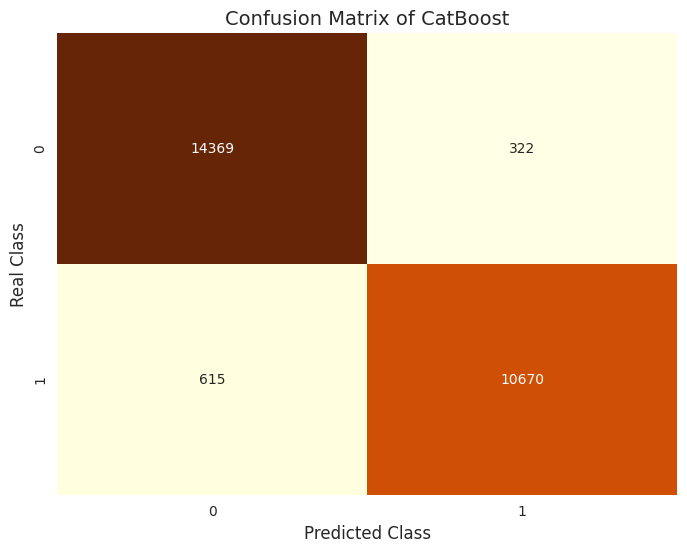

In [208]:
plot_confusion_matrix("CatBoost",y_val,y_pred_cat)

#### _Step 4.1.3 - ROC Curve_

In [210]:
from sklearn.metrics import roc_curve, roc_auc_score

In [211]:
#Let's create a function which will draw the ROC Curve and calculate AUC

In [212]:
def plot_roc_curve(model_names,y_test, y_pred_list):

    plt.figure(figsize=(8, 6))
    for i, y_pred in enumerate(y_pred_list):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        plt.plot(fpr, tpr, label=f'ROC Curve ({model_names[i]}) - AUC={auc:.2f}')

    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

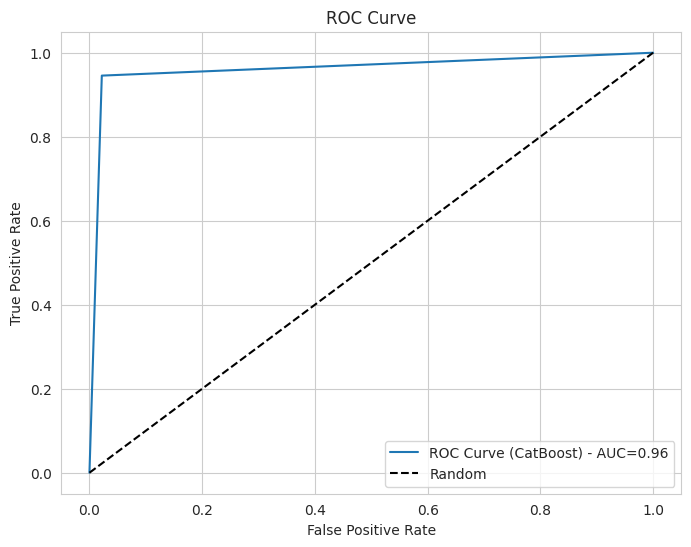

In [213]:
plot_roc_curve(["CatBoost"],y_val,[y_pred_cat])

### _Step 4.2 - Hyperparameter Tuning_

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
def tune_catboost(X, y):
    # Defining the intervals of hyperparameters
    param_grid = {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [6, 8, 10],
        'l2_leaf_reg': [3, 5, 7]
    }

    # Modelling
    catboost = CatBoostClassifier(verbose=1)

    # Main function
    grid_search = GridSearchCV(catboost, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X, y)

    print("Best parameters:", grid_search.best_params_)
    print("Best result:", grid_search.best_score_)

    return grid_search.best_params_

In [216]:
cat_best_params=tune_catboost(X_n_red_train,y_train)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
102:	learn: 0.1593620	total: 4.53s	remaining: 8.67s
103:	learn: 0.1585024	total: 4.58s	remaining: 8.62s
104:	learn: 0.1578100	total: 4.62s	remaining: 8.57s
105:	learn: 0.1571479	total: 4.67s	remaining: 8.54s
106:	learn: 0.1563090	total: 4.72s	remaining: 8.51s
107:	learn: 0.1558532	total: 4.76s	remaining: 8.47s
108:	learn: 0.1552847	total: 4.8s	remaining: 8.42s
109:	learn: 0.1545145	total: 4.84s	remaining: 8.37s
110:	learn: 0.1537491	total: 4.9s	remaining: 8.34s
111:	learn: 0.1531379	total: 4.94s	remaining: 8.29s
112:	learn: 0.1525794	total: 4.98s	remaining: 8.25s
113:	learn: 0.1520046	total: 5.03s	remaining: 8.2s
114:	learn: 0.1515514	total: 5.07s	remaining: 8.15s
115:	learn: 0.1507061	total: 5.12s	remaining: 8.12s
116:	learn: 0.1501649	total: 5.16s	remaining: 8.07s
117:	learn: 0.1497814	total: 5.2s	remaining: 8.02s
118:	learn: 0.1493433	total: 5.25s	remaining: 7.99s
119:	learn: 0.1487934	total: 5.3s	remaining: 7.94s
120:	learn: 0.1482714	

In [218]:
best_catboost = CatBoostClassifier(**cat_best_params, verbose=0)
best_catboost.fit(X_n_red_train, y_train)
y_pred_bestcat = best_catboost.predict(X_n_red_val)

In [220]:
print("Best CatBoost Accuracy on Validation Set:",accuracy_score(y_val,y_pred_bestcat))

Best CatBoost Accuracy on Validation Set: 0.9640822297505389


In [222]:
y_pred_bestcat = best_catboost.predict(X_n_red_train)
print("Best CatBoost Accuracy on Train Set:",accuracy_score(y_train,y_pred_bestcat))

Best CatBoost Accuracy on Train Set: 0.9784929678677754


In [224]:
y_pred_bestcat = best_catboost.predict(X_n_red_test)
print("Best CatBoost Accuracy on Test Set:",accuracy_score(y_test,y_pred_bestcat))

Best CatBoost Accuracy on Test Set: 0.9666230366492147


### _Step 4.3 - Model Evaluation After Tuning by Visualization_

In [240]:
# We have reached up to 0.9641 accuracy on validation set after hyperparameter tuning with the parameters of;
  # 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1
# This is the highest score among all the combinations of different scaled datasets and different models

# Also we have got a higher accuracy, 0.9666, on test set which we have never used.

# Now let's visualize the performance of the model on the test set

In [225]:
y_pred_bestcat = best_catboost.predict(X_n_red_test)
print("Best CatBoost Accuracy on the Test Set:",accuracy_score(y_test,y_pred_bestcat))

Best CatBoost Accuracy on the Test Set: 0.9666230366492147


In [241]:
print("Classification Report of the Test Set:",classification_report(y_test,y_pred_bestcat))

Classification Report of the Test Set:               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14690
           1       0.97      0.95      0.96     11286

    accuracy                           0.97     25976
   macro avg       0.97      0.96      0.97     25976
weighted avg       0.97      0.97      0.97     25976



In [242]:
# When it is compared to the reference model: there is a dramatical increase in accuracy and decrease in bias

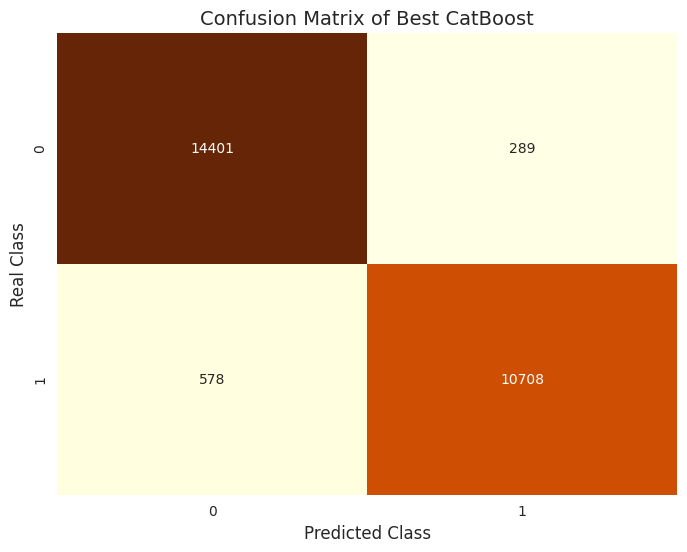

In [228]:
plot_confusion_matrix("Best CatBoost",y_test,y_pred_bestcat)

In [243]:
#Let's draw the feature importance and see if the weights are changed compared to the reference model

In [238]:
feature_importance = best_catboost.get_feature_importance(type='PredictionValuesChange')
feature_names = best_catboost.feature_names_
abs_feature_importance = [abs(imp) for imp in feature_importance]
sorted_indices = sorted(range(len(abs_feature_importance)), key=lambda i: abs_feature_importance[i], reverse=True)
sorted_importance = [abs_feature_importance[i] for i in sorted_indices]
sorted_names = [feature_names[i] for i in sorted_indices]

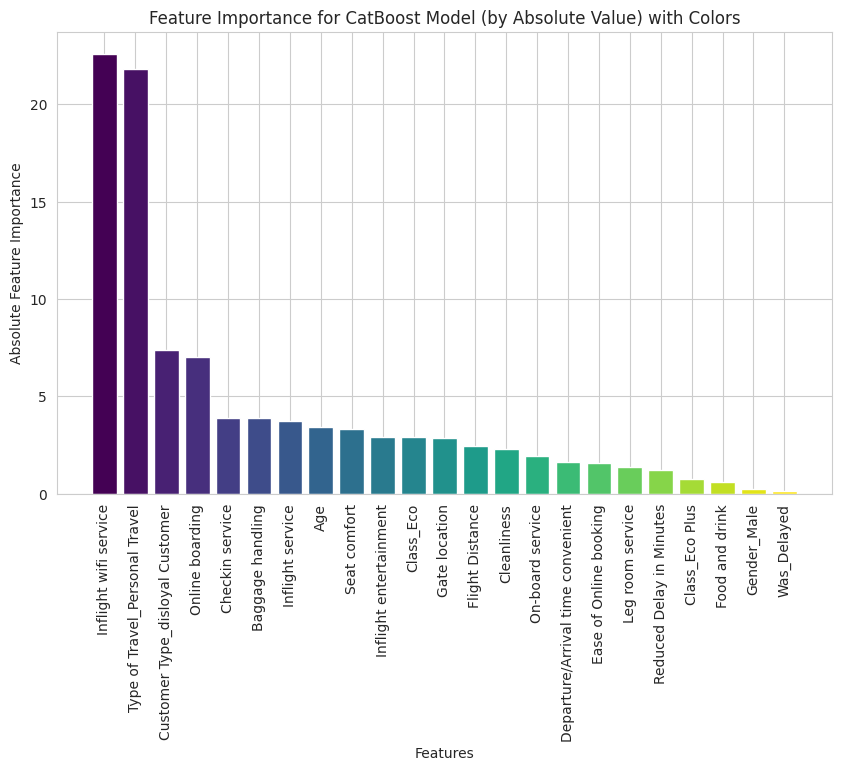

In [239]:
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_importance)))
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, color=colors)
plt.xticks(range(len(sorted_importance)), sorted_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Absolute Feature Importance")
plt.title("Feature Importance for CatBoost Model (by Absolute Value) with Colors")
plt.show()

In [ ]:
# According to our reference (basic) model, the most important features were "Type of Travel_Personal Travel", "Class_Eco_Plus" and-
# -"Disloyal Cusyomer".

# But with our best model, they have been changed to "Inflight Wifi Service" and "Type of Travel_Personal Travel". It seems like-
# -basic model could not catch the importance if inflight wifi service, which could be a reasonable reason for people to be satisfied
# as they can have a great time according to the quality of internet.